# COMP186: Foundations of Artificial Intelligence Individual Coursework

### Authors: Sahan Bulathwela, Hossein A. (Saeed) Rahmani, Xiao Fu and Joshua Spear

#### Contact:

NB: Please do **not** discuss the Coursework in the forum or any other public medium. Please ask directly during office hours or any time via an email directed to the TA assigned to the part of the assignment. The tutor and the TAs will respond either via email or via a public announcement to all students.

If you have any questions/clarifications regarding the coursework, please contact the TA responsible for that part of the coursework **via email**.
- Part 1: Wiem Ben Rim (wiem.rim.23@ucl.ac.uk)
- Part 2: Xiao Fu (xiao.fu.20@ucl.ac.uk)
- Part 3: Lynn Kandakji (l.kandakji.22@ucl.ac.uk)

- General Clarifications: Sahan Bulathwela (m.bulathwela@ucl.ac.uk)

This coursework presents a real-world dataset to the learners where they are expected to systematically develop a model that can make good predictions. The coursework attempts to test both the theoretical and practical understanding of the learners regarding training machine learning models.

## Coursework Structure

This coursework consists of three parts.

1. Exploratory data analysis and data preparation
2. Model training and evaluation
3. Demonstrating the theoretical understanding of a regression model

Parts 1 and 2 of the coursework involves multiple subtasks of building a machine learning model from data preparation to model evaluation. Part 3 systematically assists the learner to take their mathematical understanding of machine learning and build learning algorithms from scratch.

## Guidelines to Providing Solutions

- This is an **INDIVIDUAL** coursework.
- The main questions are marked in $\color{red}{red}$ to improve visibility (e.e. $\color{red}{Question\ x.x}$).
- This coursework consists of 3 parts where Part 1 and 2 carry 30 marks each and part 3 carries 40 marks.
- Each part will be marked **independently**. For example, Part 2 will be marked based solely on the code and answers provided within Part 2; answers from Part 1 or part 3 will not be considered.  
- It is expected that learners provide solutions to **ALL** parts of the coursework **in this notebook itself**.
- The learners are expected to provide solutions in this Jupyter notebook itself (Both Code and text answers.).
- The solutions should be provided in the spaces provided. You may add new cells where it is necessary.
- Cells where answers are required in English text is marked with `Your Answer Here`
    - You can use markdown language to add formatting to your text. A cheat sheet is found [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
    - Where you feel that mathematical notation is required, you can use latex syntax (e.g. `$x = 2^5$`:  $x = 2^5$)
    - Alternatively, you are allowed to attach a image of your mathematical derivations.
- Cells where program code is expected, it is marked with `Your Code Here`.
    - You are expected to provide solutions in **Python** programming language
    - You should implement the code in a way that the function signature is preserved where the function skeleton is already provided (ie, mainly 1) function name 2) input parameters and 3) output parameters).
    - Where external datasets are used, use their **relative path** in the code. This simplifies reproducing results during assessment.
    - Use commenting (`# example comment here`) to describe the crucial steps in your programming code. This will help the examiner to understand your work.
    
## Uploading Solutions

- It is expected that a **single** `.zip` file is uploaded as the solution.
- Zip the **same folder** that was provided as the assignment.
- The zipped directory should have the following files.
    - The completed assignment notebook (With Python code and English Text)
    - A PDF printout of the solutions notebook where all the output cells have been executed and the solution outputs are visible in the notebook. (**THIS IS NOT A SEPARATE  PDF REPORT !!!**)
    - The `lectures_dataset.csv`dataset CSV file (in the same relative file location where the file can be loaded to the notebook by executing the relevant cell in the solution notebook.)
    - Any additional data files you generated that become input to your solutions (put the files in the relative file locations that will allow loading the files to the notebook to execute your solution.)

## Video Lectures Dataset

This coursework works with a collection of video lectures. Different characteristics identified from the meta data, video data and transcripts of the lectures are included in the `lectures_dataset.csv` dataset.

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [3]:
#load lectures dataset
data_path = "/content/drive/MyDrive/lectures_dataset.csv"
lectures = pd.read_csv(data_path)

In [4]:
lectures.head(10)

auxiliary_rate  conjugate_rate  normalization_rate  tobe_verb_rate  \
0        0.013323        0.033309            0.034049        0.035159   
1        0.014363        0.030668            0.018763        0.036749   
2        0.019028        0.033242            0.030720        0.037827   
3        0.023416        0.042700            0.016873        0.046832   
4        0.021173        0.041531            0.023412        0.038884   
5        0.017616        0.036921            0.023649        0.043195   
6        0.011080        0.039036            0.018423        0.042257   
7        0.026247        0.038064            0.008956        0.038313   
8        0.021587        0.033706            0.018557        0.041091   
9        0.023666        0.052065            0.018933        0.027539   

   preposition_rate  pronoun_rate  document_entropy   easiness  \
0          0.121392      0.089563          7.753995  75.583936   
1          0.095885      0.103002          8.305269  86.870523   
2          0.118294      0.124255          7.965583  81.915968   
3          0.122590      0.104339          8.142877  80.148937   
4          0.130700      0.102606          8.161250  76.907549   
5          0.137307      0.098938          8.182952  76.684133   
6          0.111698      0.112342          8.101635  85.303173   
7          0.098644      0.163951          7.733064  97.572190   
8          0.099792      0.123840          8.219794  87.008975   
9          0.131239      0.108434          7.714182  88.650478   

   fraction_stopword_coverage  fraction_stopword_presence  ...  \
0                    0.428135                    0.553664  ...   
1                    0.602446                    0.584498  ...   
2                    0.525994                    0.605685  ...   
3                    0.504587                    0.593664  ...   
4                    0.559633                    0.581637  ...   
5                    0.522936                    0.575290  ...   
6                    0.596330                    0.600232  ...   
7                    0.584098                    0.687275  ...   
8                    0.541284                    0.600454  ...   
9                    0.437309                    0.617900  ...   

  title_word_count  word_count  \
0                9        2668   
1                6        7512   
2                3        4264   
3                9        2869   
4                9        4840   
5               10        4108   
6               10        7523   
7                9        7790   
8                7        5112   
9               10        2299   

                                  most_covered_topic  topic_coverage duration  \
0  http://en.wikipedia.org/wiki/Kernel_density_es...        0.414578      890   
1         http://en.wikipedia.org/wiki/Interest_rate        0.292437     2850   
2   http://en.wikipedia.org/wiki/Normal_distribution        0.271424     1680   
3  http://en.wikipedia.org/wiki/Matrix_(mathematics)        0.308092     1270   
4             http://en.wikipedia.org/wiki/Transport        0.414219     2000   
5                  http://en.wikipedia.org/wiki/Time        0.338298     1830   
6         http://en.wikipedia.org/wiki/Phase_diagram        0.438675     3060   
7  http://en.wikipedia.org/wiki/Rank_(linear_alge...        0.212774     3910   
8      http://en.wikipedia.org/wiki/Machine_learning        0.298585     2980   
9                http://en.wikipedia.org/wiki/Photon        0.300573     1040   

   lecture_type  has_parts speaker_speed silent_period_rate  median_engagement  
0            vl      False      2.997753           0.000000           0.502923  
1            vl      False      2.635789           0.000000           0.011989  
2           vit      False      2.538095           0.000000           0.041627  
3            vl      False      2.259055           0.000000           0.064989  
4           vkn      False      2.420000           0.000000           0.0

In [5]:
print(lectures.columns)

Index(['auxiliary_rate', 'conjugate_rate', 'normalization_rate',
       'tobe_verb_rate', 'preposition_rate', 'pronoun_rate',
       'document_entropy', 'easiness', 'fraction_stopword_coverage',
       'fraction_stopword_presence', 'subject_domain', 'freshness',
       'title_word_count', 'word_count', 'most_covered_topic',
       'topic_coverage', 'duration', 'lecture_type', 'has_parts',
       'speaker_speed', 'silent_period_rate', 'median_engagement'],
      dtype='object')


- The dataset contains 11,548 observations 21 potential features and 1 label column. The label we are aiming to predict is `median_engagement` which can take a value between 0 and 1 where values close to 0 exhibit low engagement and values close to 1 indicate high engagement.  

### Description of Columns

The following table describes the columns in the dataset.

|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | Fraction of auxiliary verbs in the transcript |
| conjugate_rate             | Fraction of conjugates in the transcript |
| normalization_rate         | Fraction of normalisation suffixes used in the transcript |
| tobe_verb_rate             | Fraction of to-be-verbs in the transcript |
| preposition_rate           | Fraction of prepositions in the transcript |
| pronoun_rate               | Fraction of pronouns words in the transcript |
| document_entropy           | Document entropy computed using word counts (Topic coherence) |
| easiness                   | The reading level of the transcript (level of English) |
| fraction_stopword_coverage | Fraction of unique stopwords used in the transcript |
| fraction_stopword_presence | Fraction of stopwords in the transcript |
| subject_domain             | If the subject belongs to STEM or not. |
| freshness                  | How recently the video published |
| title_word_count           | Number of words in the title |
| word_count                 | Number of words in the transcript |
| most_covered_topic         | The Wikipedia URL of the most covered topic |
| topic_coverage             | To what degree is the most covered topic covered |
| duration                   | Duration of the video |
| lecture_type               | Type of lecture (e.g. lecture, tutorial, debate, discussion etc.) |
| has_parts                  | If the lecture is broken into multiple videos |
| speaker_speed              | The word rate of the speaker (words per minute) |
| silent_period_rate         | Fraction of Silence in the transcript where words are not spoken |
| median_engagement          | Median % of video watched by all the viewers who watched it |

# Part 1: Exploratory Data Analysis and Feature Extraction (30 Marks)

This section attempts to understand the dataset before we jump into building a machine learning model.

## $\color{Red}{Question\ 1.1.}$ What are the different data types each variable in the dataset belong to?
There are different data types different variables fall into. Based on these data types, we may handle these variables differently. In this question, you are expected to identify which data type each variable in the lecture dataset belongs to.
- Replace the `Your Answer Here` with your answer
- Possible values: Continuous, Discrete, Ordinal and Categorical

In [6]:
#print data type
# code recycled from AI4BH lab 1 to identify variable type in a dataset

print(lectures.dtypes)

#code to classify each column
for column in lectures.columns:
  dtype = lectures[column].dtype
  if dtype == 'object':
    print(f"{column}: Categorical (Ordinal or Nominal)")
    #if categorical, print the unique columns so I can manually inspect if ordinal or nominal
    unique_values = lectures[column].unique()
    print(f"Unique values for {column}: {unique_values}")
  elif dtype == 'int64':
    print(f"{column}: Discrete")
  elif dtype == 'float64':
    print(f"{column}: Continuous")

  else:
    print(f"{column}: Unknown data type")


auxiliary_rate                float64
conjugate_rate                float64
normalization_rate            float64
tobe_verb_rate                float64
preposition_rate              float64
pronoun_rate                  float64
document_entropy              float64
easiness                      float64
fraction_stopword_coverage    float64
fraction_stopword_presence    float64
subject_domain                 object
freshness                       int64
title_word_count                int64
word_count                      int64
most_covered_topic             object
topic_coverage                float64
duration                        int64
lecture_type                   object
has_parts                      object
speaker_speed                 float64
silent_period_rate            float64
median_engagement             float64
dtype: object
auxiliary_rate: Continuous
conjugate_rate: Continuous
normalization_rate: Continuous
tobe_verb_rate: Continuous
preposition_rate: Continuous
pronoun_r

|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | **Continuous** |
| conjugate_rate             | **Continuous** |
| normalization_rate         | **Continuous** |
| tobe_verb_rate             | **Continuous** |
| preposition_rate           | **Continuous** |
| pronoun_rate               | **Continuous** |
| document_entropy           | **Continuous** |
| easiness                   | **Continuous** |
| fraction_stopword_coverage | **Continuous** |
| fraction_stopword_presence | **Continuous** |
| subject_domain             | **Categorical** |
| freshness                  | **Discrete** |
| title_word_count           | **Discrete** |
| word_count                 | **Discrete** |
| most_covered_topic         | **Categorical** |
| topic_coverage             | **Continuous** |
| duration                   | **Discrete** |
| lecture_type               | **Categorical** |
| has_parts                  | **Categorical** |
| speaker_speed              | **Continuous** |
| silent_period_rate         | **Continuous** |
| median_engagement          | **Continuous** |

## $\color{Red}{Question\ 1.2.}$ Analyse the variables to understand them.
This question expects you to carry out `exploratory data analysis` on the dataset to understand the data and the value distributions better. This enables us to carry out specific pre-processing steps.
- List the analyses you would carry out with the features and the labels of the dataset. Justify why you think the proposed analyses are appropriate.
- Carry Out the Analyses you proposed.
    - **You are NOT permitted to use data analysis libraries that automatically run a brute-force set of analyses on the entire dataset. Usage of such libraries will be penalised.**
    - You may use visualisation libraries such as `matplotlib`, `plotly`, `seaborn` etc.
    - You may also use data processing libraries such as `pandas`, `numpy`, `scipy` etc.
    - You are expected to do as many analyses as you feel necessary to understand the data to make informed decisions about preprocessing.
    - You may use as many code cells as you deem necessary here to carry out your analysis. However, do not include analyses that are not meaningful for understanding the dataset (ones that you are unable to justify).
    - Use a markdown cell on top of the code cells to describe the analysis you are carrying out and its justification.

#### Choice of Analyses to be carried out with justification
1. **Distribution of Response variable:**  
This helps understand the shape of the response and illustrate how the data is spread out. It can also help identify any nonsensical values (e.g., negative values) or outliers.

2. **Missing values**  
If there are any missing values, missing value imputation will need to be carried out. Alternatively, data may need to be removed. I need to also see if there are any patterns behind the missing values (e.g., maybe a certain subject_domain has more missing values than others).


3. **Maximum, minimum and quartiles for numerical variables**.   
This is simply to view distribution of numerical explanatory variables, to identify any skewness or whether scaling is necessary.

4. **Plots of Explanatory Variables**.   
Used to show distribution of explanatory variables to identify skewness or if there is any class imbalances. Also used to identify outliers or any nonsensical values

5. **Correlation Matrix and Pairplot**.   
Used to identify the correlation coefficient between pairs of variables. It can be used to identify multicollinearity between explanatory variables (indicating one of the variables may need to be removed). It also shows which explanatory variables have a strong linear relationship with the response. Those with a weak relationship with the response may need to be removed.

6. **Boxplots and Catplots of categorical variables vs response**.   
The correlation matrix (in analysis 5) cannot show correlations for between categorical explanatory variables and the response, hence I used boxplots of categorical variables vs response variable. This gives a high level view on whether there are correlations between different categories and the response.

7. **Deeper analysis of subject_domain variable**.   
Subject_domain had missing values (from analysis 2), hence I want to see how other explanatory numerical variables differs for each subject_domain category. This could assist with better missing value imputation later, rather than simply fitting a 'mean' or 'mode' value across all categories.

8. **Plots between Explanatory variables**.   
Not exhaustive - but want to plot relationship between categorical and numerical explanatory variables to identify if there are any correlations.

9. **Count Outliers per Category**.   
Count the number of outliers per column. Outliers can adversely impact model performance and will need to be dealt with. Outliers will be removed from the model or capped. Outliers can also impact summary statistics like the mean.

10. **ANOVA test for subject_domain on Response**.   
From Analysis 2, there is an extremely large number of entries in subject_domain missing, hence it might be easier to delete the column altogether - as imputation might produce too much of an artificial representation of the data (since so many rows are being imputed). However, I will do an analysis of variance test first, to test whether subject_domain is statistically significant in explaining variation in median_engagement

#### Analysis 1
Distribution of the Response variable

In [7]:
# Your Code Here
# distribution of the response
def cont_summary(dataframe, col_name):
    sns.histplot(x=dataframe[col_name], data=dataframe)
    plt.xlabel(col_name)
    plt.ylabel("Density")
    plt.title(f"Distribution of {col_name}")
    plt.show()

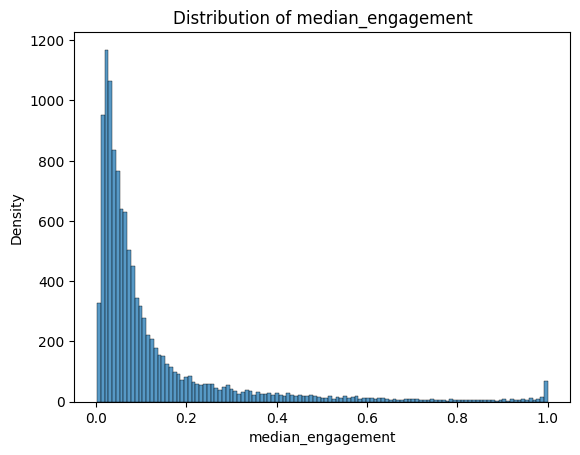

In [8]:
cont_summary(lectures, 'median_engagement')

#### Analysis 2 ####
Missing Values


In [9]:
# Your Code Here
# Missing values
print(lectures.isnull().sum())

auxiliary_rate                   0
conjugate_rate                   0
normalization_rate               0
tobe_verb_rate                   0
preposition_rate                 0
pronoun_rate                     0
document_entropy                 0
easiness                         0
fraction_stopword_coverage       0
fraction_stopword_presence       0
subject_domain                5635
freshness                        0
title_word_count                 0
word_count                       0
most_covered_topic               0
topic_coverage                   0
duration                         0
lecture_type                     0
has_parts                     2152
speaker_speed                    0
silent_period_rate               0
median_engagement                0
dtype: int64


#### Analysis 3 ####
Maximum, minimum and quartiles for numerical variables

In [10]:
# get numerical data and plot its quarties
numerical_df = lectures.select_dtypes(include=np.number)
print(numerical_df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

                                    0.00          0.05          0.50  \
auxiliary_rate                  0.000000      0.007778      0.015441   
conjugate_rate                  0.000000      0.027577      0.039472   
normalization_rate              0.000000      0.008966      0.019856   
tobe_verb_rate                  0.000000      0.029921      0.043179   
preposition_rate                0.000000      0.088700      0.116836   
pronoun_rate                    0.000000      0.085410      0.122261   
document_entropy                0.000000      6.789402      7.876202   
easiness                       28.210966     73.064348     84.429664   
fraction_stopword_coverage      0.000000      0.223242      0.498471   
fraction_stopword_presence      0.000000      0.542648      0.613258   
freshness                   10830.000000  12850.000000  14750.000000   
title_word_count                1.000000      2.000000      7.000000   
word_count                      1.000000    468.000000   3642.50

#### Analysis 4 ####
Plots of Explanatory variables

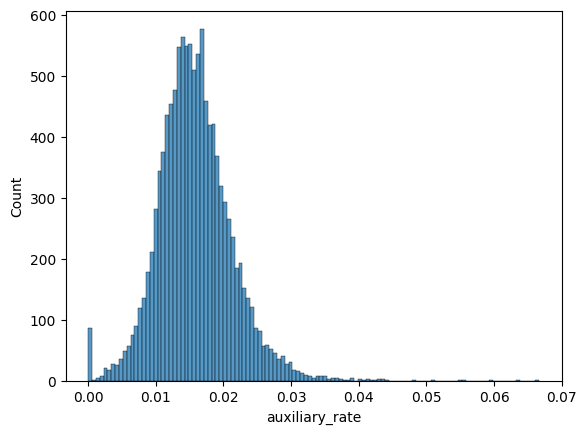

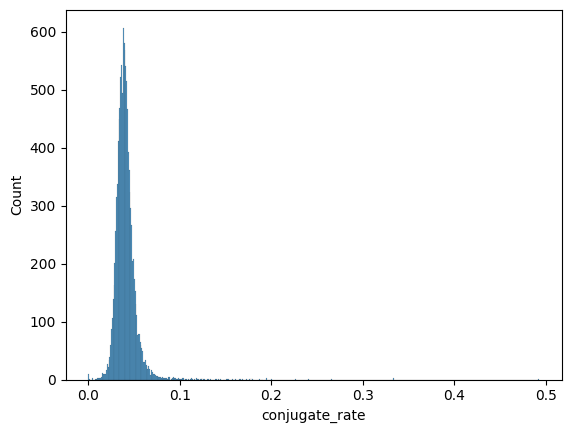

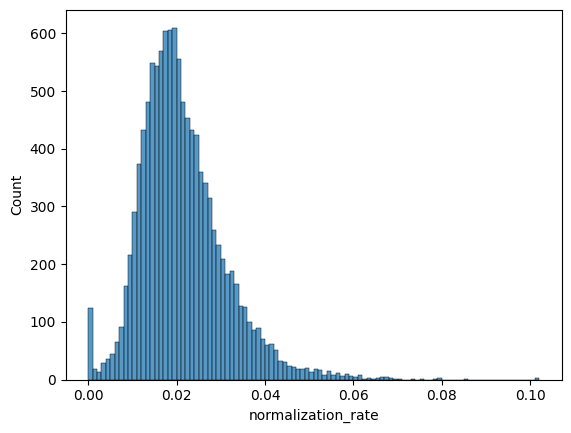

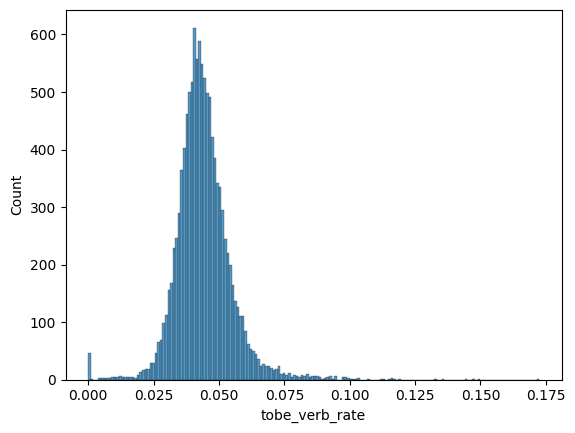

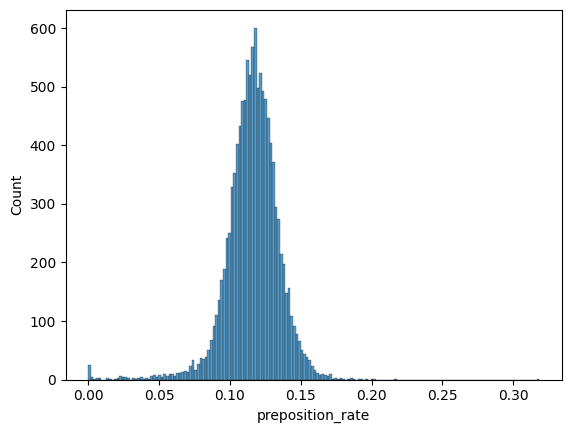

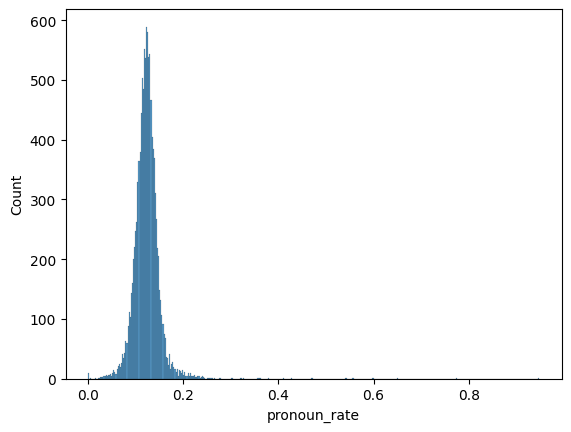

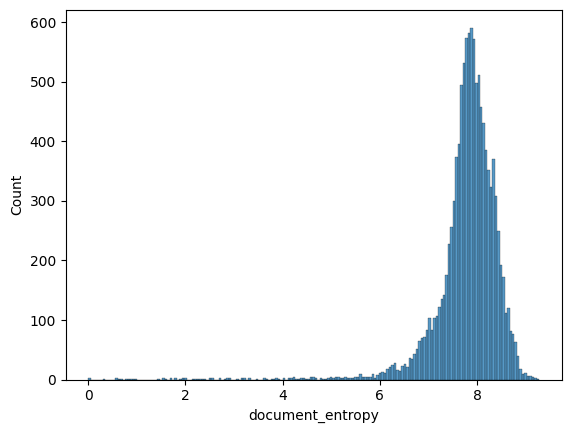

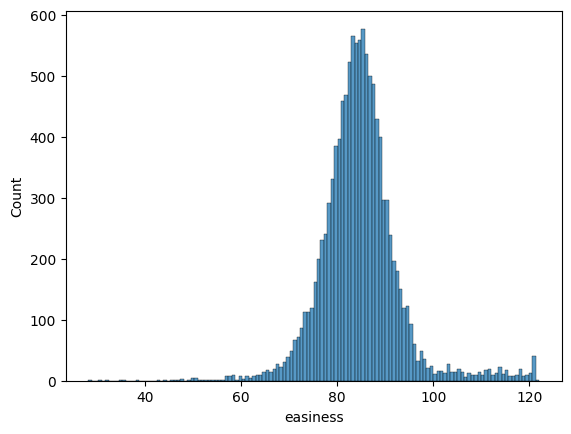

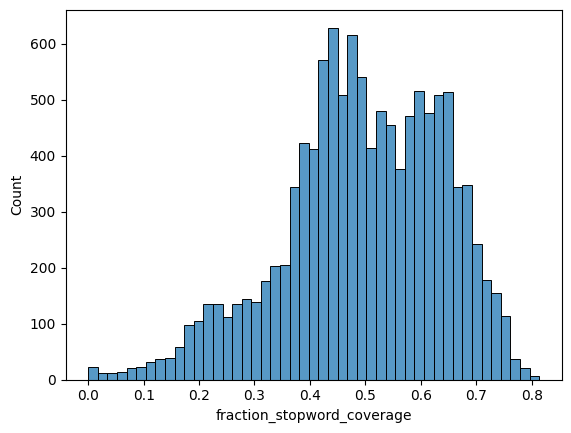

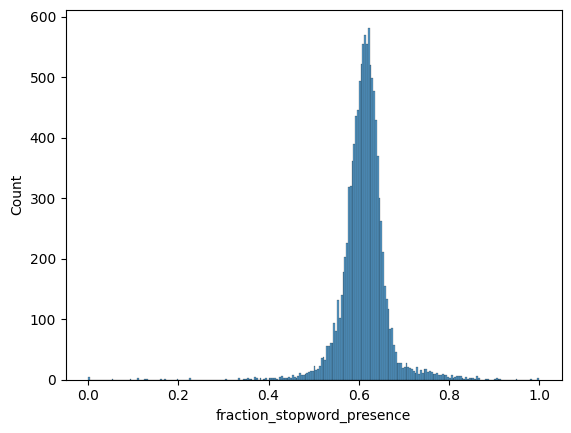

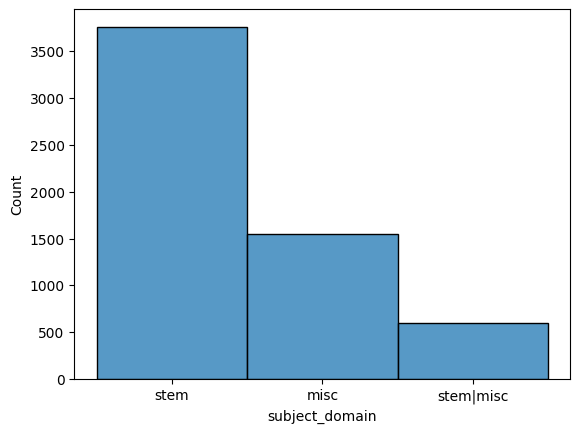

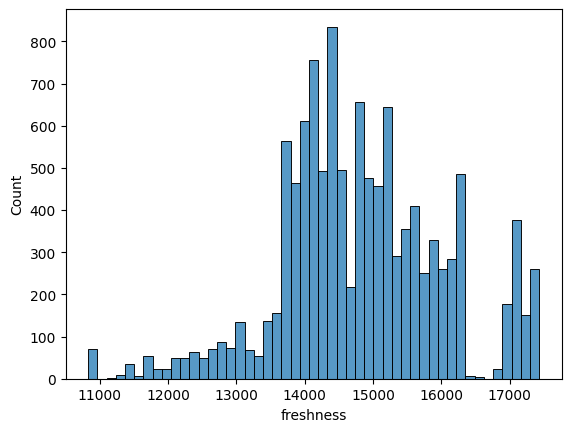

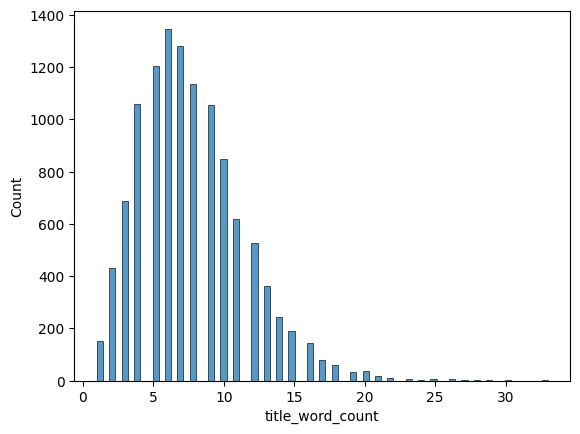

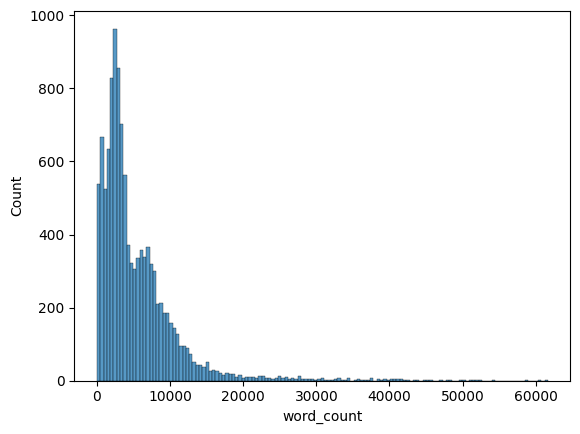

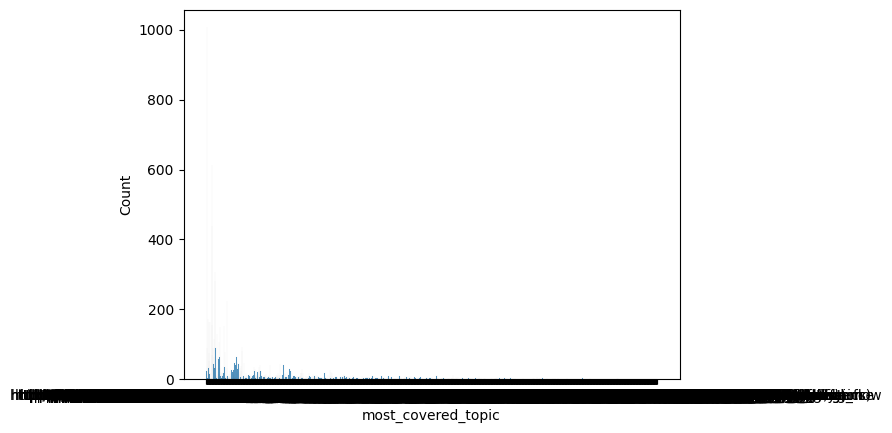

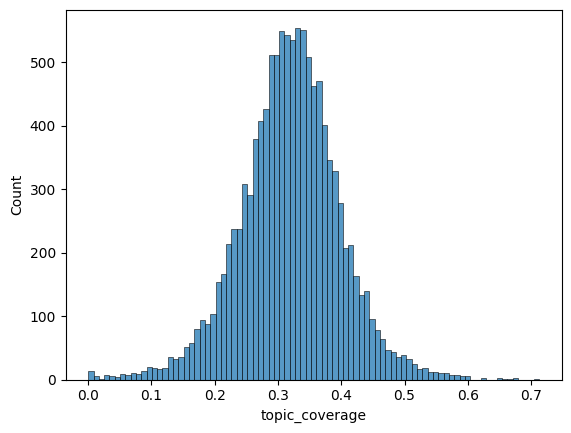

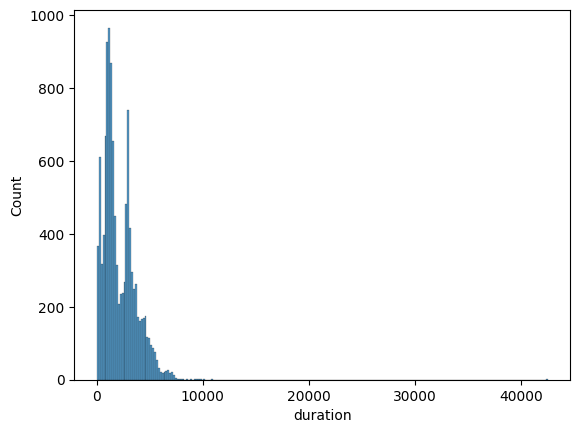

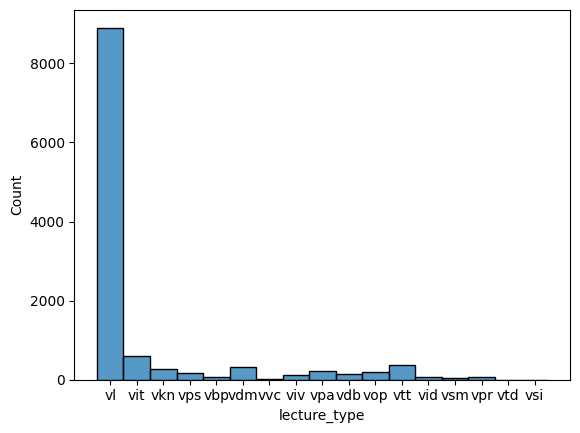

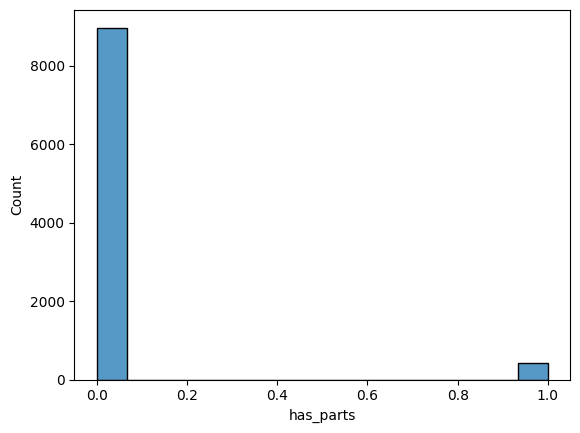

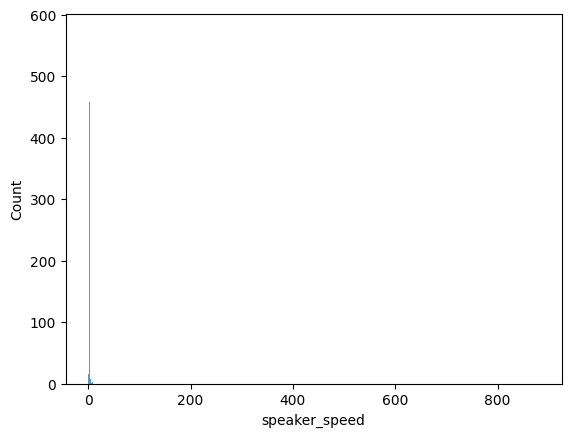

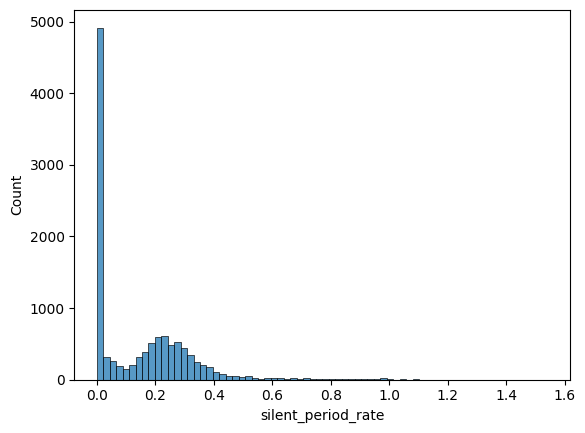

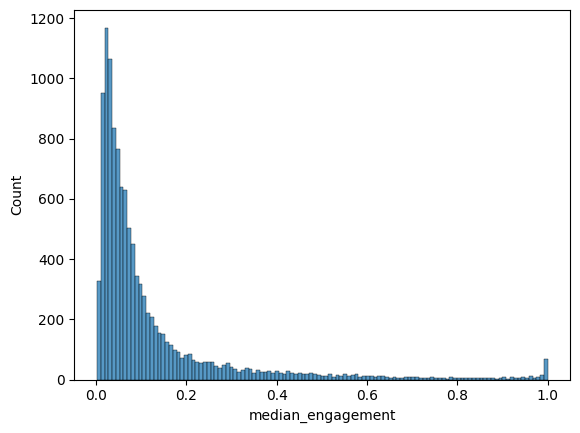

In [11]:
#explanatory variable plots
for col in lectures.columns:

  sns.histplot(data=lectures, x=col)
  plt.show()

#### Analysis 5 ####
Correlation Plot and Pairplot

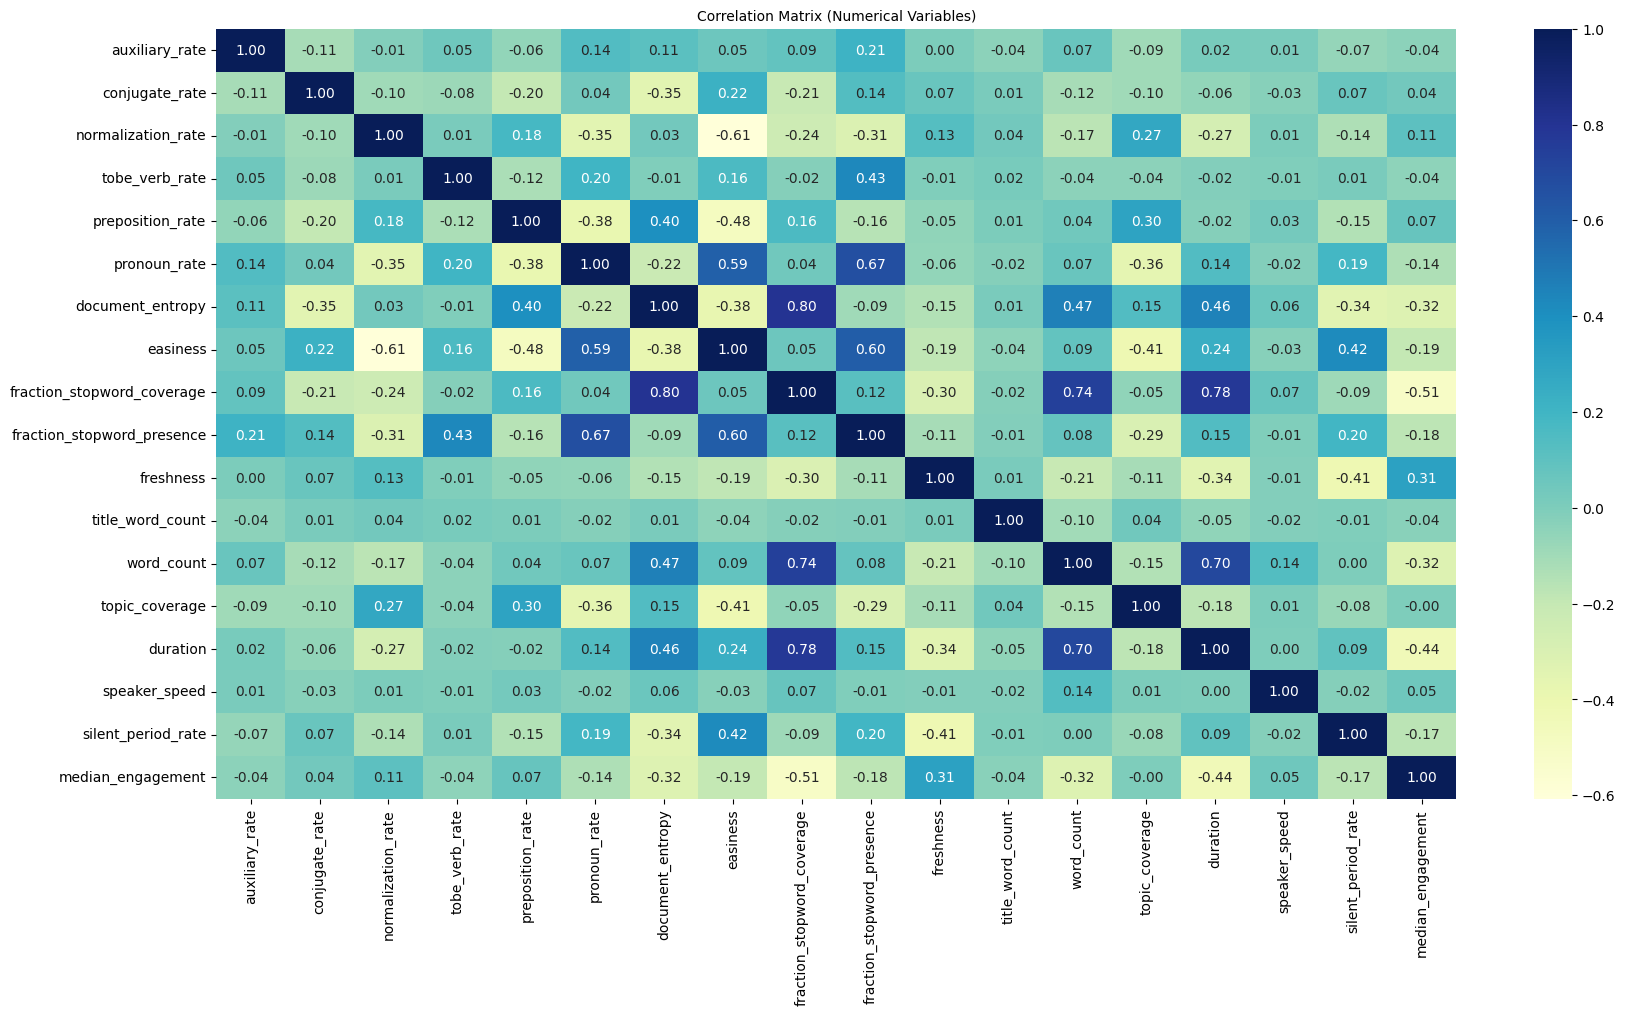

In [12]:
# get numerical columns
num_cols = [col for col in lectures.columns if lectures[col].dtypes != "O"]

# plot corr matrix
corr_matrix = lectures[num_cols].corr()

f, ax = plt.subplots(figsize=[20, 10])
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, cmap="YlGnBu")
ax.set_title("Correlation Matrix (Numerical Variables)", fontsize=10)
plt.show()

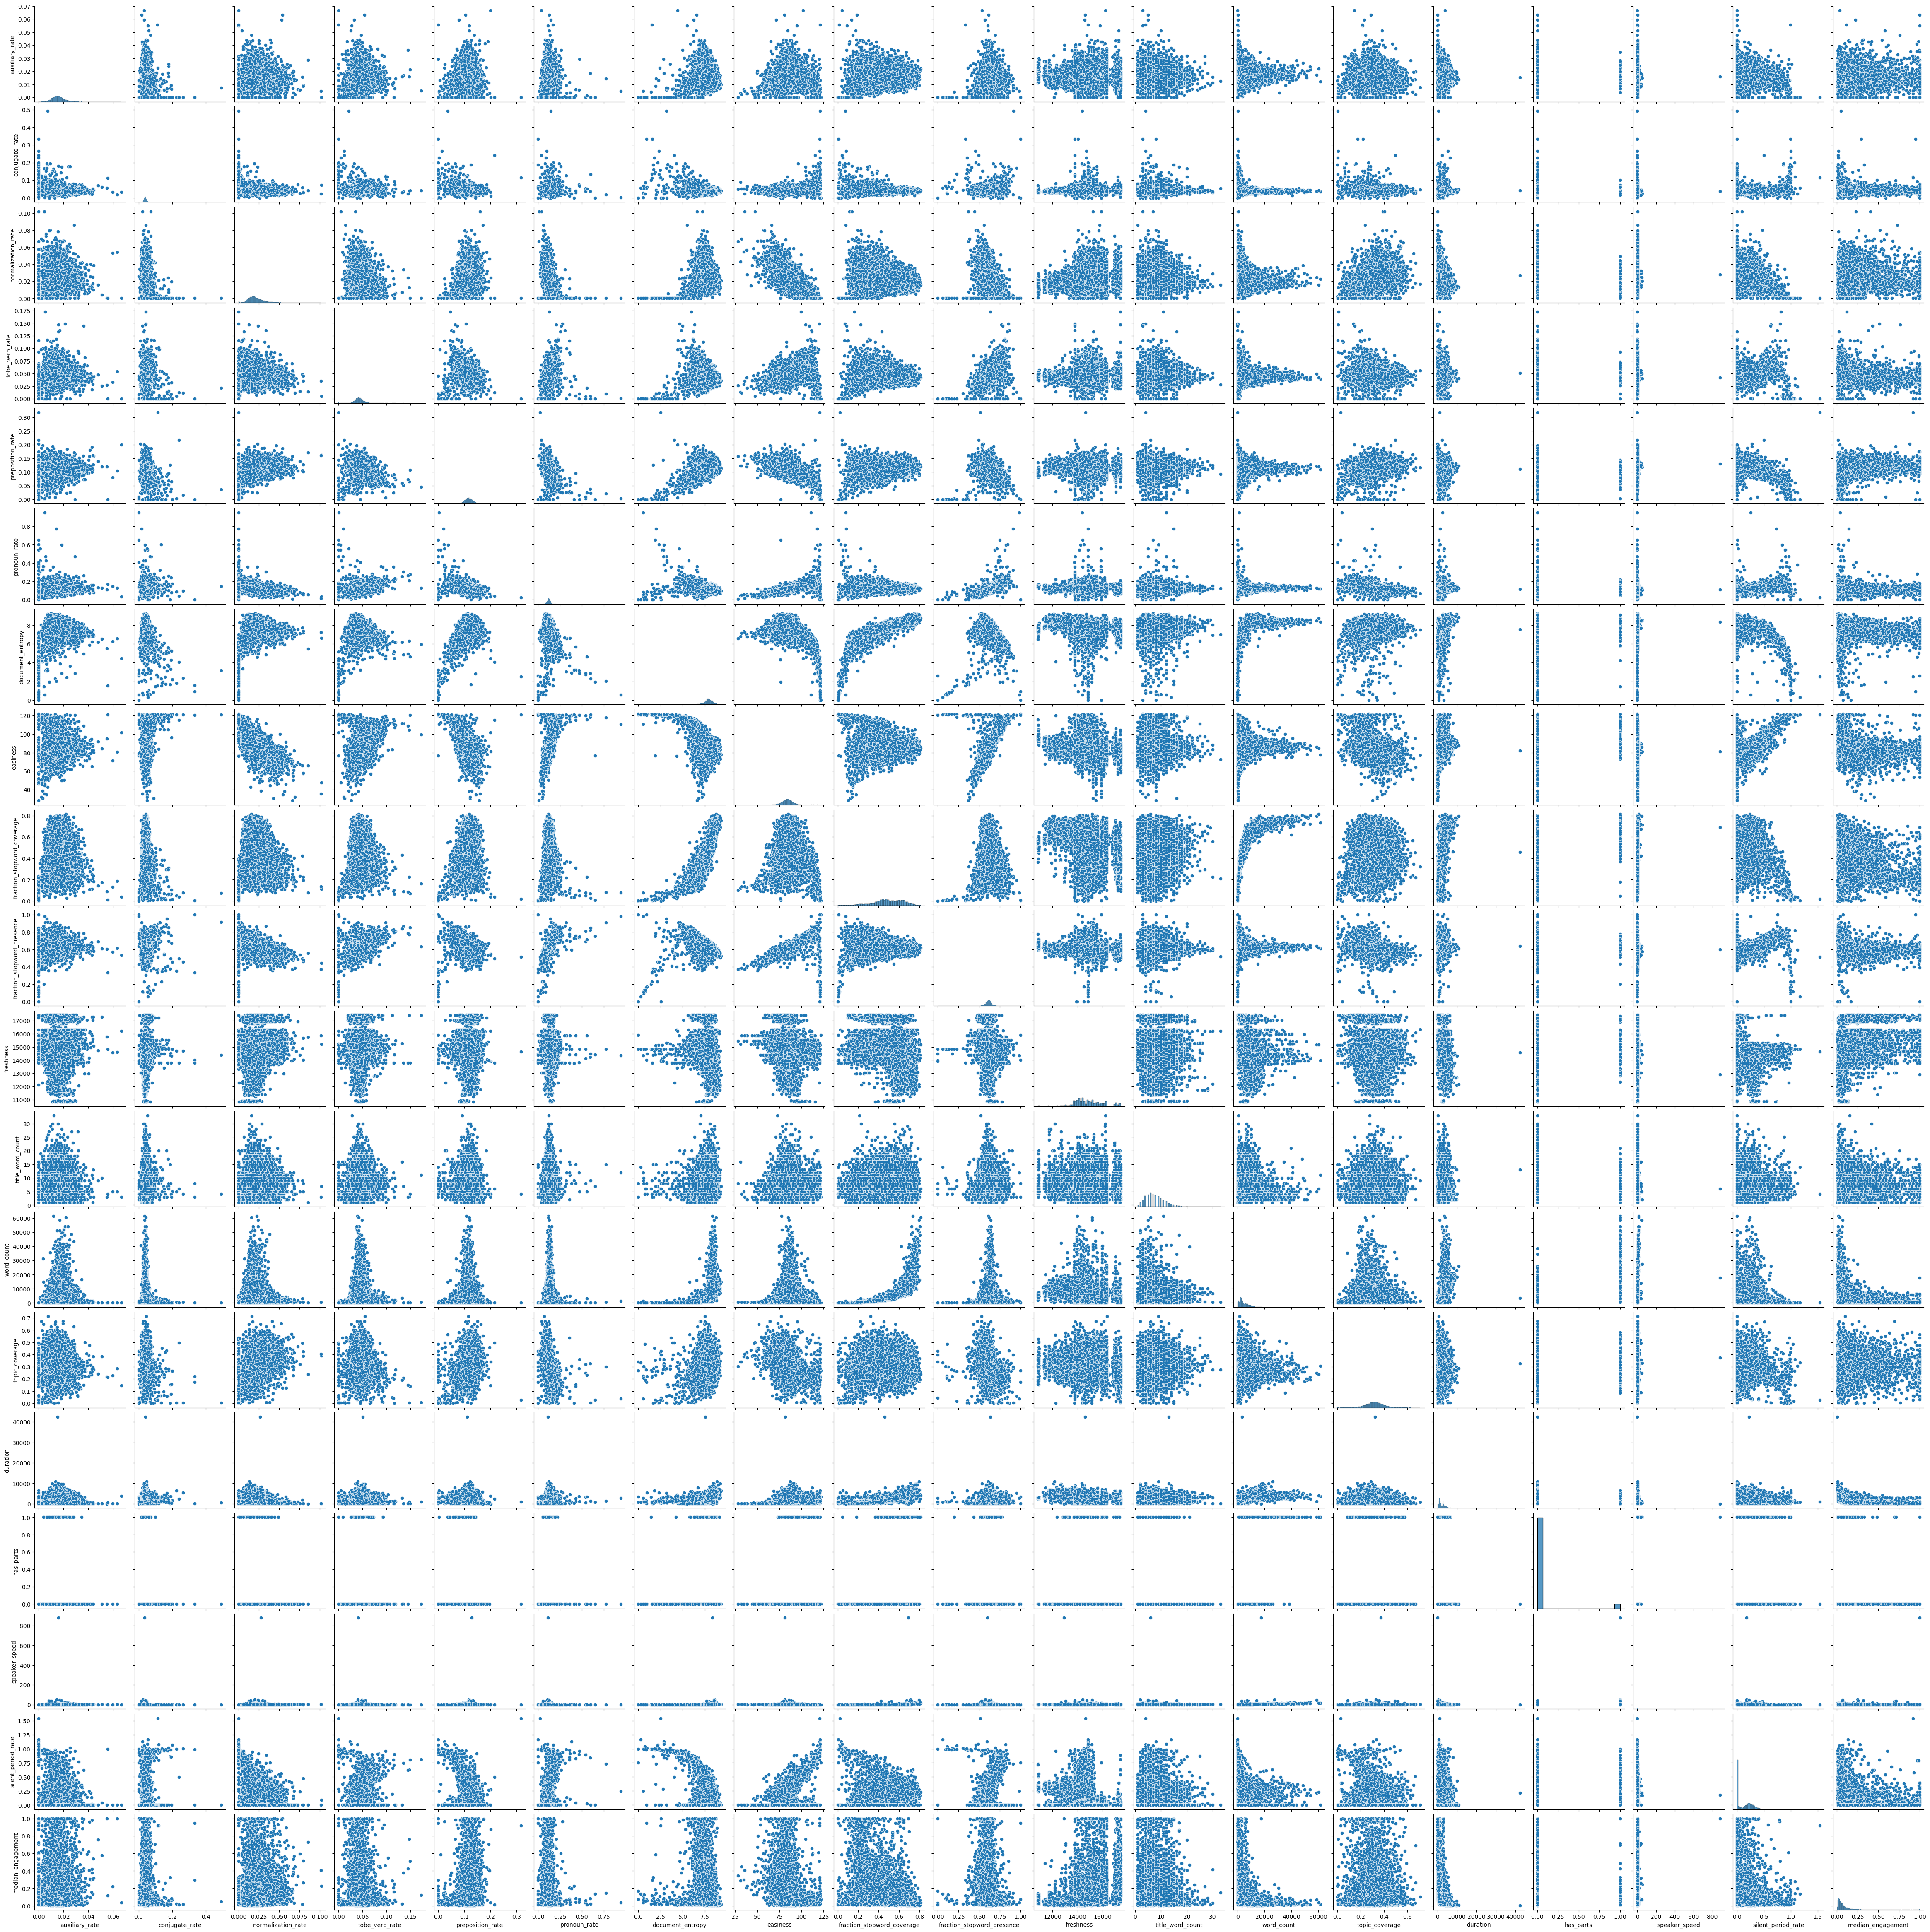

In [13]:
# pairplot
sns.pairplot(lectures)

#### Analysis 6 ####
Boxplots and Catplots of categorical variables vs response

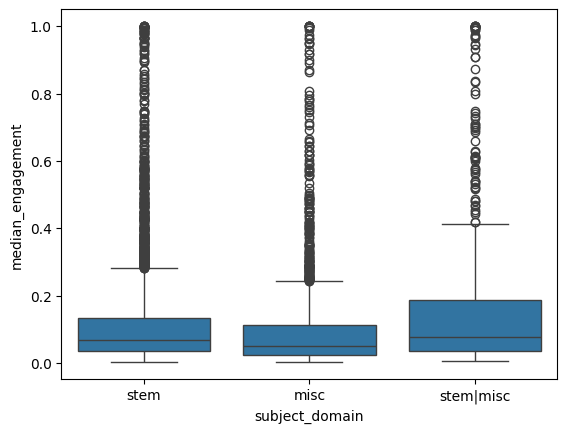

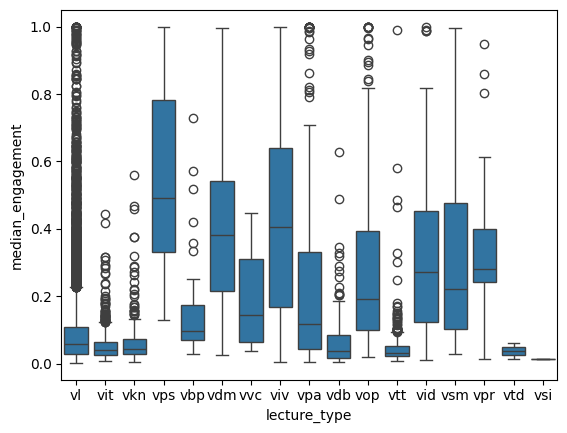

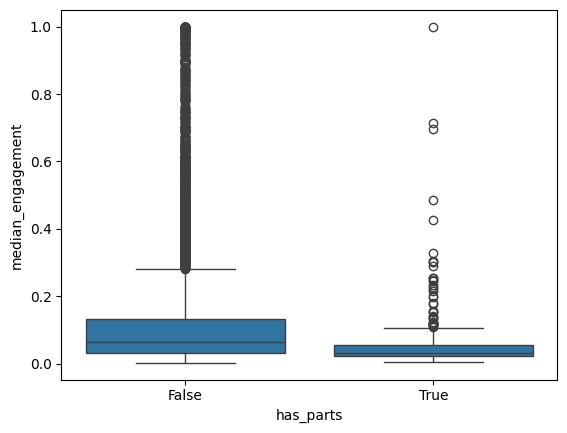

In [14]:
sns.boxplot(x='subject_domain', y='median_engagement', data=lectures)
plt.show()

sns.boxplot(x='lecture_type', y='median_engagement', data=lectures)
plt.show()

sns.boxplot(x='has_parts', y='median_engagement', data=lectures)
plt.show()

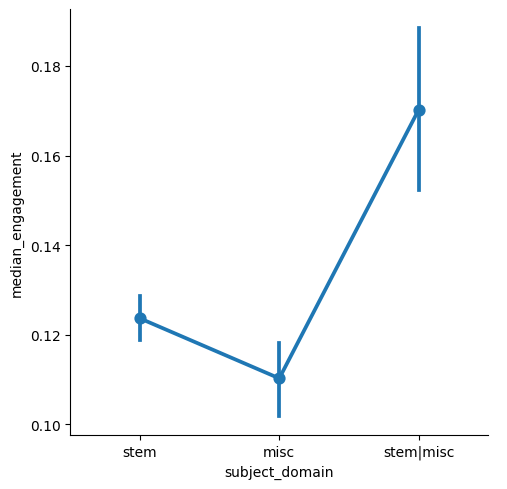

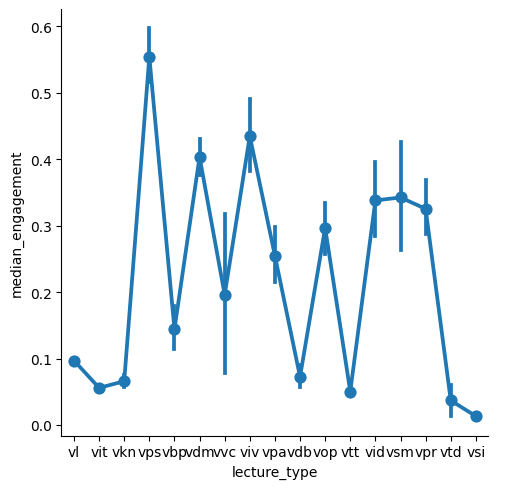

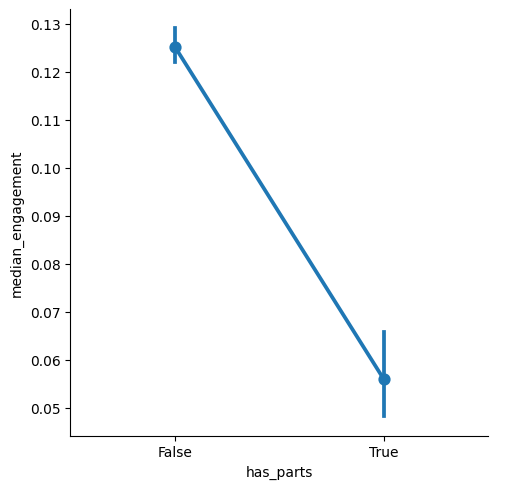

In [15]:
sns.catplot(x='subject_domain', y='median_engagement', data=lectures, kind = 'point')
plt.show()

sns.catplot(x='lecture_type', y='median_engagement', data=lectures, kind = 'point')
plt.show()

sns.catplot(x='has_parts', y='median_engagement', data=lectures, kind = 'point')
plt.show()


#### Analysis 7 ####
Deeper analysis of subject_domain variable

In [16]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

target_summary_with_num(lectures,"subject_domain","auxiliary_rate")
target_summary_with_num(lectures,"subject_domain","conjugate_rate")
target_summary_with_num(lectures,"subject_domain","normalization_rate")
target_summary_with_num(lectures,"subject_domain","tobe_verb_rate")
target_summary_with_num(lectures,"subject_domain","preposition_rate")
target_summary_with_num(lectures,"subject_domain","pronoun_rate")
target_summary_with_num(lectures,"subject_domain","document_entropy")
target_summary_with_num(lectures,"subject_domain","easiness")
target_summary_with_num(lectures,"subject_domain","fraction_stopword_coverage")
target_summary_with_num(lectures,"subject_domain","fraction_stopword_presence")
target_summary_with_num(lectures,"subject_domain","freshness")
target_summary_with_num(lectures,"subject_domain","title_word_count")
target_summary_with_num(lectures,"subject_domain","word_count")
target_summary_with_num(lectures,"subject_domain","topic_coverage")
target_summary_with_num(lectures,"subject_domain","duration")
target_summary_with_num(lectures,"subject_domain","speaker_speed")
target_summary_with_num(lectures,"subject_domain","silent_period_rate")
target_summary_with_num(lectures,"subject_domain","median_engagement")


                auxiliary_rate
subject_domain                
misc                  0.014973
stem                  0.016073
stem|misc             0.015946


                conjugate_rate
subject_domain                
misc                  0.042965
stem                  0.039979
stem|misc             0.042856


                normalization_rate
subject_domain                    
misc                      0.020134
stem                      0.021984
stem|misc                 0.021037


                tobe_verb_rate
subject_domain                
misc                  0.044619
stem                  0.043664
stem|misc             0.044670


                preposition_rate
subject_domain                  
misc                    0.121755
stem                    0.113385
stem|misc               0.119637


                pronoun_rate
subject_domain              
misc                0.120962
stem                0.123190
stem|misc           0.123816


                document_entropy
subje

#### Analysis 8####
Plots between Explanatory variables

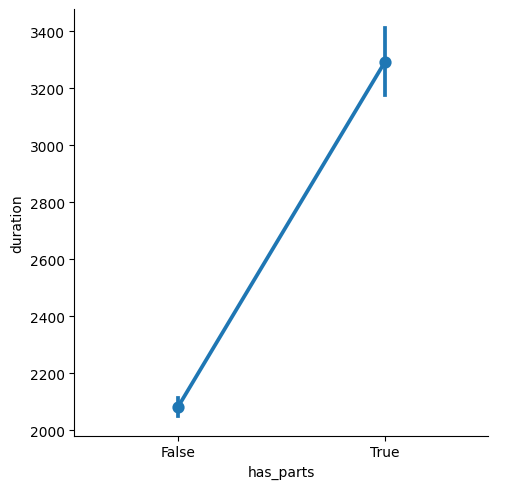

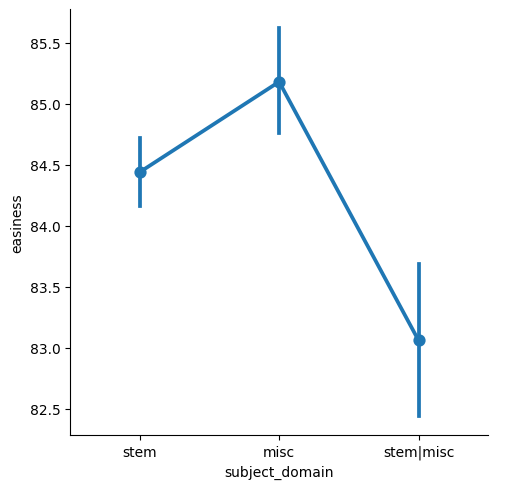

In [17]:
sns.catplot(x='has_parts', y='duration', data=lectures, kind = 'point')
plt.show()

sns.catplot(x='subject_domain', y='easiness', data=lectures, kind = 'point')
plt.show()

#### Analysis 9 ####
Outliers

In [18]:
# count outliers
# outlier is defined as a z-value with absolute value greater than 3
def count_outliers(lectures):
  outliers_count = {}
  for column in lectures.select_dtypes(include=np.number).columns:
    z = (lectures[column] - lectures[column].mean()) / lectures[column].std()
    num_outliers = len(lectures[abs(z) > 3])
    outliers_count[column] = num_outliers

  return pd.DataFrame.from_dict(outliers_count, orient='index', columns=['Outlier Count'])

outlier_df = count_outliers(lectures)
print(outlier_df)

                            Outlier Count
auxiliary_rate                         82
conjugate_rate                        114
normalization_rate                    149
tobe_verb_rate                        211
preposition_rate                      151
pronoun_rate                          124
document_entropy                      158
easiness                              302
fraction_stopword_coverage             51
fraction_stopword_presence            219
freshness                              70
title_word_count                       95
word_count                            227
topic_coverage                        119
duration                               91
speaker_speed                           8
silent_period_rate                    202
median_engagement                     337


#### Analysis 10####

ANOVA test for subject_domain on Response

In [19]:
# Anova test for subject domain on response

data = {'subject_domain': lectures['subject_domain'],
        'median_engagement': lectures['median_engagement']}
df = pd.DataFrame(data)

model = ols('median_engagement ~ subject_domain', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)

                    df      sum_sq   mean_sq          F        PR(>F)
subject_domain     2.0    1.572991  0.786496  27.256729  1.647454e-12
Residual        5910.0  170.533628  0.028855        NaN           NaN


#### Question

Summarise the key findings of your analyses.

**Your Answer Here**

1. **Distribution of Response variable:**  
Median_engagement is skewed to the right. Most observations are less than 0.2. There are no nonsensical values

2. **Missing values**  
The subject_domain and has_parts columns have quite a lot of missing values. Missing value imputation will need to be done. Subject_domain in particular has more than 5000 rows of missing values


3. **Maximum, minimum and quartiles for numerical variables**.   
Some sort of scaling will need to be done in preprocessing. I ended up using Standard scaling

4. **Plots of Explanatory Variables**.   
Most of the numerical explanatory variables have evidence of outliers. Most of the numerical variables have the shape of a normal distribution. There is a class imbalance in subject_domain (there are more 'stem' observations than other observations). Most_covered_topic has a very large number of categorical observations hence this variable may need to be removed, as they wouldn't provide value to the model. Lecture_type also seems to have a severe class imbalance (most are of type 'vl'). There is also a class imbalance with has_parts - most observations are false. Speaker speed seems to have very large outliers. There are also many rows with a 0 silent period rate.

5. **Correlation Matrix and Pairplot**.   
fraction_stopword_coverage is highly correlated (0.8) with document_entropy, word_count and duration. Perhaps fraction_stopword_coverage will be removed from the model to avoid multicollinearity. There are also correlations between word_count and duration as well as pronoun_rate and fraction_stopword_presence. Certain variables like auxilliary_rate, conjugate_rate, tobe_verb_rate, title_word_count and topic_coverage have a very low correlation with the response, hence these may be removed from the final model to help the model focus on the most important features.

6. **Boxplots and Catplots of categorical variables vs response**.   
There are lots of outliers across all categories. For subject_domain, the median value of median_engagement was roughly the same for each category. Lecture_type had quite a varying experience with median_engagement, however number of data observations for certain categories were quite low.

7. **Deeper analysis of subject_domain variable**.   
Different subject domains appeared to have different median_engagements, silent period rates, durations, word counts, freshness and fraction_stopword_coverage. This could influence how imputation will be done.

8. **Plots between Explanatory variables**.   
As expected, if a lecture has parts (where has_parts is True), then its duration will be longer.

9. **Count Outliers per Category**.   
There are a very large number of outliers in this dataset. Removing all the outliers will result in a large loss of data, hence techniques like capping may need to be used.

10. **ANOVA test for subject_domain on Response**.   
Subject_domain has a low p-value on the ANOVA test. It is statistically significant and will hence be included in the model, despite the large number is missing observations.


## $\color{Red}{Question\ 1.3.}$ Derive conclusions from your analyses and implement data preprocessing.
This question expects you to derive conclusions and implement preprocessing steps based on the analyses carried out in the previous question. Use the markdown cell to propose preprocessing steps and the code cell to implement the preprocessing function.  
- Based on the results obtained in the previous section, identify noteworthy observations (e.g. missing values, outliers etc.)? Describe what you observed and the implications.  
- How are you going to preprocess the dataset based on these observations? Justify your preprocessing steps in relation to the analyses.
- In the subsequent code cell, implement the `preprocess_lecture_dataset` function to take the entire dataset as input and carry out preprocessing
- You may use additional code cells to implement sub-functions.

#### Question: Justification

**Your Answer Here.**

## Missing values ##
There were missing values accross subject_domain and has_parts. There was a lot of missing values for subject_domain, hence I am going to simply create a new category for observations that have missing values. I will call this "Missing." I.e., I will fill missing entries in subject_domain with a value of "Missing." Typically I would do missing value imputation and impute the missing values based on existing categories, however I am labelling "Missing" instead, in order to avoid model bias and to explicitly recognize that the entry was missing, so missing entries will be treated as a separate category. It also helps preserve information on the dataset and avoids us guessing which values are meant to be in which row.  
Has_parts is a binary variable hence I simply filled missing values with False (the 'mode' observation)- primarily for simplicity.  
Both columns had a fairly large number of missing values. Removing rows with missing values would have resulted in too much data being lost.  

## Outliers ##
Overall, there were lots of outliers in the data, as shown in the distribution plots. Removing all rows with outliers would be resulted in a lot of data being lost. Therefore, in certain columns with large numbers of outliers ('tobe_verb_rate', 'easiness', 'fraction_stopword_presence', 'word_count', 'silent_period_rate'), outliers were replaced with a value of within 3 standard deviations of the mean (a technique called capping). This was to ensure the whole row of data was not lost, it also maintains data shape and could improve modelling; however it comes at a cost of distorting the true data. For other columns with fewer outliers, the row with the outlier was deleted completely. This was to prevent too many artificial changes being made to the dataset. Outliers could represent genuine valid points, however they would adversely impact the model hence they were removed or capped.

## Scaling ##
A Standard scaler was applied to numerical columns. Scaling has generally been proven to improve the model.


## Columns dropped ##
Most_covered_topic was dropped since it could take on many values. Fraction_stopword_coverage was dropped as it had a high correlation coefficient with other explanatory variables (duration, word_count and document_entropy). Auxilliary_rate, conjugate_rate, tobe_verb_rate and title_word_count were also dropped as these had a very low correlation coefficient with the response variable (< 0.05). Dropping these variables can help the model focus on the most important features. It also helps reduce dimensionality of the dataset - which had been increased due to one-hot encoding in the next section.

## Encoding ##
The categorical variables need to be encoded to numerical values. Label encoding was used for the binary variable has_parts. Label encoding is appropriate for binary variables, or where there exists an ordinal relationship between categories. One-hot encoding was used subject_domain and lecture_type. The ANOVA test showed that subject_domain was statistically significant. Furthermore, the boxplots of lecture type vs response showed that different lecture types had significantly different median_engagements, hence they were included in the model. This comes at a cost though - lecture_type has many different category types, hence one hot encoding of this column greatly increases the dimensionality of the dataset.



In [20]:
def preprocess_lecture_dataset(dataset):
    """
    takes the lecture dataset and transforms it with necessary pre-processing steps.

    Params:
        dataset (pandas.DataFrame): DataFrame object that contains the original dataset provided for the coursework

    Returns:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the dataset after data
                                                pre-processing has been carried out
    """

    # Your Code Here

    #MISSING VALUE IMPUTATION

    #Subject_domain
    dataset['subject_domain'].fillna("Missing", inplace=True)

    #has_parts
    most_frequent_has_parts = dataset['has_parts'].mode()[0]
    dataset['has_parts'].fillna(most_frequent_has_parts, inplace=True)

    #OUTLIERS
    # Cap outliers for specific columns as 3 standard deviations of the mean
    for column in ['tobe_verb_rate', 'easiness', 'fraction_stopword_presence', 'word_count', 'silent_period_rate']:
      z_scores = (dataset[column] - dataset[column].mean()) / dataset[column].std()
      #calculate capped values. Use same value if not an outlier
      capped_values = np.where(np.abs(z_scores) > 3,
                             dataset[column].mean() + 3 * dataset[column].std() * np.sign(z_scores), dataset[column])
      dataset[column] = capped_values #replace the column

    # remove outliers for other columns using Z-score
    for column in dataset.select_dtypes(include=np.number).columns:
        if column not in ['tobe_verb_rate', 'easiness', 'fraction_stopword_presence', 'word_count', 'silent_period_rate', 'median_engagement']:
            z_scores = (dataset[column] - dataset[column].mean()) / dataset[column].std()
            outliers = dataset[abs(z_scores) > 3]
            dataset = dataset.drop(outliers.index)

    dataset = dataset.reset_index(drop=True)


    #SCALING
    # standard scaling to numerical columns
    scaler = StandardScaler()
    columns_to_scale = ['auxiliary_rate', 'conjugate_rate', 'normalization_rate', 'tobe_verb_rate', 'preposition_rate', 'pronoun_rate', 'document_entropy', 'easiness', 'fraction_stopword_coverage', 'fraction_stopword_presence', 'freshness', 'title_word_count', 'word_count', 'topic_coverage', 'duration', 'speaker_speed', 'silent_period_rate']
    dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])


    preprocessed_dataset = dataset
    return preprocessed_dataset

In [21]:
preprocessed_lectures = preprocess_lecture_dataset(lectures)

<ipython-input-20-7fb857d8ee8f>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['has_parts'].fillna(most_frequent_has_parts, inplace=True)
<ipython-input-20-7fb857d8ee8f>:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['has_parts'].fillna(most_frequent_has_parts, inplace=True)


In [22]:
preprocessed_lectures.head()

auxiliary_rate  conjugate_rate  normalization_rate  tobe_verb_rate  \
0       -0.536249       -0.806408            1.556603       -1.008651   
1       -0.319645       -1.127263           -0.309608       -0.825676   
2        0.651971       -0.814551            1.150175       -0.701740   
3        1.565972        0.334529           -0.540312        0.334352   
4        1.098695        0.192532            0.257988       -0.580050   

   preposition_rate  pronoun_rate  document_entropy  easiness  \
0          0.263601     -1.641209         -0.330914 -1.391006   
1         -1.442646     -0.956315          0.956208  0.438272   
2          0.056415      0.126815          0.163105 -0.364739   
3          0.343739     -0.888188          0.577053 -0.651132   
4          0.886308     -0.976508          0.619951 -1.176481   

   fraction_stopword_coverage  fraction_stopword_presence  ...  \
0                   -0.637502                   -1.594213  ...   
1                    0.720321                   -0.742392  ...   
2                    0.124784                   -0.157063  ...   
3                   -0.041966                   -0.489172  ...   
4                    0.386820                   -0.821433  ...   

  title_word_count  word_count  \
0         0.391607   -0.609596   
1        -0.456879    0.493426   
2        -1.305366   -0.246173   
3         0.391607   -0.563827   
4         0.391607   -0.115012   

                                  most_covered_topic  topic_coverage  \
0  http://en.wikipedia.org/wiki/Kernel_density_es...        1.301883   
1         http://en.wikipedia.org/wiki/Interest_rate       -0.404395   
2   http://en.wikipedia.org/wiki/Normal_distribution       -0.697951   
3  http://en.wikipedia.org/wiki/Matrix_(mathematics)       -0.185702   
4             http://en.wikipedia.org/wiki/Transport        1.296877   

   duration  lecture_type  has_parts speaker_speed  silent_period_rate  \
0 -0.892778            vl      False      0.401714           -0.938057   
1  0.487577            vl      False      0.126612           -0.938057   
2 -0.336410           vit      False      0.052362           -0.938057   
3 -0.625158            vl      False     -0.159716           -0.938057   
4 -0.111046           vkn      False     -0.037394           -0.938057   

   median_engagement  
0           0.502923  
1           0.011989  
2           0.041627  
3           0.064989  
4           0.052154  

[5 rows x 22 columns]

In [23]:
len(preprocessed_lectures)

10486

In [24]:
preprocessed_lectures

auxiliary_rate  conjugate_rate  normalization_rate  tobe_verb_rate  \
0           -0.536249       -0.806408            1.556603       -1.008651   
1           -0.319645       -1.127263           -0.309608       -0.825676   
2            0.651971       -0.814551            1.150175       -0.701740   
3            1.565972        0.334529           -0.540312        0.334352   
4            1.098695        0.192532            0.257988       -0.580050   
...               ...             ...                 ...             ...   
10481        0.066842       -0.765178            1.300790        1.546922   
10482       -0.259518       -0.094794            1.218124       -0.450395   
10483        2.456083       -0.476932           -0.895110        0.500090   
10484       -0.015246       -1.660390           -0.343424       -0.898501   
10485       -0.886499       -1.130324            0.228934        0.518780   

       preposition_rate  pronoun_rate  document_entropy  easiness  \
0              0.263601     -1.641209         -0.330914 -1.391006   
1             -1.442646     -0.956315          0.956208  0.438272   
2              0.056415      0.126815          0.163105 -0.364739   
3              0.343739     -0.888188          0.577053 -0.651132   
4              0.886308     -0.976508          0.619951 -1.176481   
...                 ...           ...               ...       ...   
10481          1.681027     -0.098916         -0.638550 -1.363952   
10482         -0.373843      0.342493         -0.265963 -0.574746   
10483         -1.037886      0.675238         -0.221712  1.606788   
10484         -0.704207      0.088800          0.794078  1.783911   
10485          1.348976     -0.524389         -0.036102 -0.468988   

       fraction_stopword_coverage  fraction_stopword_presence  ...  \
0                       -0.637502                   -1.594213  ...   
1                        0.720321                   -0.742392  ...   
2                        0.124784                   -0.157063  ...   
3                       -0.041966                   -0.489172  ...   
4                        0.386820                   -0.821433  ...   
...                           ...                         ...  ...   
10481                   -0.375466                    0.290420  ...   
10482                   -0.089609                    0.009692  ...   
10483                   -0.041966                    1.198161  ...   
10484                    1.697001                    0.202078  ...   
10485                    0.482106                    0.747827  ...   

      title_word_count  word_count  \
0             0.391607   -0.609596   
1            -0.456879    0.493426   
2            -1.305366   -0.246173   
3             0.391607   -0.563827   
4             0.391607   -0.115012   
...                ...         ...   
10481         0.674436   -0.281695   
10482         0.957265   -0.418093   
10483        -1.305366   -0.299684   
10484        -1.588195    3.470264   
10485        -1.305366    0.823604   

                                      most_covered_topic  topic_coverage  \
0      http://en.wikipedia.org/wiki/Kernel_density_es...        1.301883   
1             http://en.wikipedia.org/wiki/Interest_rate       -0.404395   
2       http://en.wikipedia.org/wiki/Normal_distribution       -0.697951   
3      http://en.wikipedia.org/wiki/Matrix_(mathematics)       -0.185702   
4                 http://en.wikipedia.org/wiki/Transport        1.296877   
...                                                  ...             ...   
10481               http://en.wikipedia.org/wiki/Science        0.999447   
10482                  http://en.wikipedia.org/wiki/Time        0.427861   
10483           http://en.wikipedia.org/wiki/File_system        0.812850   
10484  http://en.wikipedia.org/wiki/Graph_(discrete_m...       -1.057504   
10485        http://en.wikipedia.org/wiki/Complex_number        0.040387   

       duration  lecture_type  has_parts s

## $\color{Red}{Question\ 1.4}$ Numerically encode the dataset for model training.
This question expects you to create the final numerical dataset you will use to carry out model training with ridge regression.

- Implement the `prepare_final_dataset` function to transform different features.
- Features that belong to different data types need to be transformed to an ideal numerical representation
- You may use helper functions in `scikit-learn` machine learning library to implement this function.

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def prepare_final_dataset(preprocessed_dataset):
    """
    takes the preprocessed lecture dataset and transforms it to the vector representation.

    Params:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the original
                                                dataset provided for the coursework

    Returns:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
    """

    # Your Code Here

    #Drop columns

    # Remove the 'most_covered_topic' column since it has too many categoies
    preprocessed_dataset = preprocessed_dataset.drop('most_covered_topic', axis=1)

    #DROP MULTICOLLINEARITY VARIABLES AND UNCORRELATED VARIABLES
    preprocessed_dataset = preprocessed_dataset.drop('fraction_stopword_coverage', axis=1)
    preprocessed_dataset = preprocessed_dataset.drop('auxiliary_rate', axis=1)
    preprocessed_dataset = preprocessed_dataset.drop('conjugate_rate', axis=1)

    preprocessed_dataset = preprocessed_dataset.drop('tobe_verb_rate', axis=1)
    preprocessed_dataset = preprocessed_dataset.drop('title_word_count', axis=1)

    # Label encoding for 'has_parts'
    le = LabelEncoder()
    preprocessed_dataset['has_parts'] = le.fit_transform(preprocessed_dataset['has_parts'])

    # One-hot encoding for 'subject_domain' and 'lecture_type'
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_features = encoder.fit_transform(preprocessed_dataset[['subject_domain', 'lecture_type']])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

    # drop original columns from df
    preprocessed_dataset = pd.concat([preprocessed_dataset.drop(['subject_domain', 'lecture_type'], axis=1), encoded_df], axis=1)

    # separate response from explanatory
    X = preprocessed_dataset.drop('median_engagement', axis=1)
    y = preprocessed_dataset['median_engagement']

    return preprocessed_dataset, X, y

In [26]:
final_dataset, full_X, full_y = prepare_final_dataset(preprocessed_lectures)

In [27]:
full_X

normalization_rate  preposition_rate  pronoun_rate  document_entropy  \
0                1.556603          0.263601     -1.641209         -0.330914   
1               -0.309608         -1.442646     -0.956315          0.956208   
2                1.150175          0.056415      0.126815          0.163105   
3               -0.540312          0.343739     -0.888188          0.577053   
4                0.257988          0.886308     -0.976508          0.619951   
...                   ...               ...           ...               ...   
10481            1.300790          1.681027     -0.098916         -0.638550   
10482            1.218124         -0.373843      0.342493         -0.265963   
10483           -0.895110         -1.037886      0.675238         -0.221712   
10484           -0.343424         -0.704207      0.088800          0.794078   
10485            0.228934          1.348976     -0.524389         -0.036102   

       easiness  fraction_stopword_presence  freshness  word_count  \
0     -1.391006                   -1.594213   1.262692   -0.609596   
1      0.438272                   -0.742392   0.493159    0.493426   
2     -0.364739                   -0.157063   0.724019   -0.246173   
3     -0.651132                   -0.489172   0.664166   -0.563827   
4     -1.176481                   -0.821433   0.074191   -0.115012   
...         ...                         ...        ...         ...   
10481 -1.363952                    0.290420  -0.558535   -0.281695   
10482 -0.574746                    0.009692  -0.780845   -0.418093   
10483  1.606788                    1.198161  -0.720992   -0.299684   
10484  1.783911                    0.202078  -0.473032    3.470264   
10485 -0.468988                    0.747827  -0.216521    0.823604   

       topic_coverage  duration  ...  lecture_type_vl  lecture_type_vop  \
0            1.301883 -0.892778  ...              1.0               0.0   
1           -0.404395  0.487577  ...              1.0               0.0   
2           -0.697951 -0.336410  ...              0.0               0.0   
3           -0.185702 -0.625158  ...              1.0               0.0   
4            1.296877 -0.111046  ...              0.0               0.0   
...               ...       ...  ...              ...               ...   
10481        0.999447 -0.251898  ...              1.0               0.0   
10482        0.427861 -0.392751  ...              1.0               0.0   
10483        0.812850  0.276299  ...              1.0               0.0   
10484       -1.057504  1.093243  ...              0.0               0.0   
10485        0.040387  1.043945  ...              1.0               0.0   

       lecture_type_vpa  lecture_type_vpr  lecture_type_vps  lecture_type_vsi  \
0                   0.0               0.0               0.0               0.0   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
10481               0.0               0.0               0.0               0.0   
10482               0.0               0.0               0.0               0.0   
10483               0.0               0.0               0.0               0.0   
10484               0.0               0.0               0.0               0.0   
10485               0.0               0.0               0.0               0.0   

       lecture_type_vsm  lecture_type_vtd  lecture_type_vtt  lecture_type_vvc  
0                   0.0               0.0               0.0               0.0  
1                   0.0               0.0               0.0               0.0  
2                   0.0               0.0               0.0               0.0  
3                   0.0

In [28]:
full_y

0        0.502923
1        0.011989
2        0.041627
3        0.064989
4        0.052154
           ...   
10481    0.032299
10482    0.044655
10483    0.038525
10484    0.012572
10485    0.032745
Name: median_engagement, Length: 10486, dtype: float64

Let us now save the final data

In [29]:
full_X.to_csv("features_final.csv", index=False)
np.save("labels_final.npy", full_y.to_numpy())

# Part 2: Modeling and Evaluation (30 Marks)

In this section, we develop a model using the preprocessed data. We start by loading the data that we saved in the previous part.

In [30]:
full_X = pd.read_csv("features_final.csv")
full_y = np.load("labels_final.npy")

# If you didn't manage to save the preprocessed data structures from part one.
# You can start the exercise with alternative data. But the performance will be very low.

# full_X = pd.read_csv("features_seed.csv")
# full_y = np.load("labels_seed.npy")

## $\color{Red}{Question\ 2.1}$ Train Ridge Regression Model.
In this question, you are expected to derive a trained ridge regression model.

- Implement the `train_model` function to output the trained ridge regression model.
- You may use helper functions and models in `scikit-learn` library

In [31]:
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge


In [32]:

def train_ridge_model(X,y, hyperparams):
    """
    takes the training data with the hyper-parameters to train the ridge model

    Params:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name,
                            and the value is the hyperparameter value

    Returns:
        ridge_model(scikit-learn model): A trained scikit-learn model object
        :
    """
    # Your Code Here

    ridge_model = Ridge(**hyperparams) # create model with parameters from dict
    ridge_model.fit(X, y)

    # Your Code Here

    return ridge_model

- Define the python dictionary `hyperparams` with the hyperparameters needed for Ridge Regression.

In [33]:
hyperparams = {
    # Your Code Here
    "alpha": 1.0 #set to 1 arbitrarily
    #for other parameters, the default value will be used

}

In [34]:
temp_ridge_model = train_ridge_model(full_X, full_y, hyperparams)

## $\color{Red}{Question\ 2.2}$ Gaussian (RBF) Kernel Regression Model
In this question, you are expected to implement the Gaussian (Radial Basis Function/ RBF) kernel and use it with Ridge Regression to train a Kernel Ridge model that uses the Gaussian Kernel.

- Implement the `gauss_kernel` function to output the similarity between two points (`x` and `x_dash`) using the Gaussian kernel.
- You may use helper functions `numpy` and `scipy` libraries to speed up matrix computations. But the function should be implemented by you.

In [35]:
def gauss_kernel(x, x_dash, gamma):
    """
    takes two data points and calculates their similarity using the RBF function.

    params:
        x (numpy.array): point 1 coordinates
        x_dash (numpy.array): point 2 coordinates
        gamma : relevant hyperparameter for the Gaussian Kernel

    returns:
        similarity (float): similarity between the two points
    """

    # Your Code Here
    #Euclidean distance formaula
    distance_squared = np.linalg.norm(x - x_dash) ** 2
    #RBF kernel formula
    similarity = np.exp(-gamma * distance_squared)



    return similarity

- Implement the `train_kernel_ridge_model` function to output the trained kernel ridge regression model.
- Use the relevant parameters in the [`sklearn.kernel_ridge.KernelRidge`](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn-kernel-ridge-kernelridge) function to pass the `gauss_kernel` function implemented earlier with kernel regression.
- Training this model may take some time ($\approx$ 10 minutes).

In [36]:

def train_kernel_ridge_model(X,y, hyperparams, kernel_function, kernel_params):
    """
    takes the training data with the hyper-parameters to train the ridge model

    Params:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name,
                            and the value is the hyperparameter value
        kernel_function (callable): a callable python function which is the kernel function
        kernel_params (dict): a dictionary of kernel parameters where the key is the kernel parameter name,
                            and the value is the parameter value

    Returns:
        kernel_ridge_model(scikit-learn model): A trained scikit-learn model object
    """

    # Your Code Here

    kernel_ridge_model = KernelRidge(**hyperparams, kernel=kernel_function, kernel_params=kernel_params)
    kernel_ridge_model.fit(X, y)



    return kernel_ridge_model

In [37]:
hyperparams = {
    "alpha" : 0.1
}

kernel_params = {
    "gamma" : 1e-2
}
#default values will be used for the rest of the parameters

temp_kernel_ridge_model = train_kernel_ridge_model(full_X, full_y, hyperparams, gauss_kernel, kernel_params)

In [38]:
temp_y = temp_kernel_ridge_model.predict(full_X)
print(temp_y)

[0.20139885 0.06870741 0.09177886 ... 0.03779462 0.04127039 0.01827834]


## $\color{Red}{Question\ 2.3}$ Propose and Implement two evaluation metrics that are suitable for model evaluation in this task.
This question expects you to propose two evaluation metrics that can be used to assess predictive capabilities in this task and implement them.

- Propose two metrics by replacing `Your Answer Here`. You are encourage to propose metrics that go beyond the ones taught in class.
- implement the two metrics while renaming function names from `eval_metric_1` and `eval_metric_2` to the metrics you are proposing.

**Metric 1**

**Your Answer Here**

Mean square error (MSE). Measures the squared difference between predicted and actual value

In [39]:
def eval_metric_1(y_actual, y_predicted):
    """
    returns the evaluation metric.

    Params:
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels

    Returns:
        metric (float): the evaluation metric
    """

    # Your Code Here

    #MSE formula
    metric = np.mean((y_actual - y_predicted)**2)

    return metric

**Metric 2**

**Your Answer Here**

R-squared statistic. It measures the proportion of variance of the response that can be explained by the model.

In [40]:
def eval_metric_2(y_actual, y_predicted):
    """
    returns the evaluation metric.

    Params:
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels

    Returns:
        metric (float): the evaluation metric
    """

    # Your Code Here
    # R squared formula
    ss_res = np.sum((y_actual - y_predicted)**2)
    ss_tot = np.sum((y_actual - np.mean(y_actual))**2)
    r2 = 1 - (ss_res / ss_tot)
    metric = r2

    return metric

## $\color{Red}{Question\ 2.4}$ Evaluate the performance of the Ridge Regression model to detect overfitting.
In this question, you are expected to implement a function to evaluate the predictive performance of a trained Ridge Regression model and detect if overfitting is evident.

- Implement the `evaluate_ridge_model` function to take in the lectures data and
    - Handle the data carefully before training the model
    - Design a pipeline that incorporates comprehensive techniques to ensure robust and reliable model training and evaluation.
    - train the model
    - evaluate the model using the proposed metrics and
    - print the relevant information to assess model performance (including overfitting)
- The function does NOT have to return anything. Make sure it prints the relevant metrics instead.
- You are expected to design the training methodology to end up training the most generalisable model from the data provided.

In [41]:
from sklearn.model_selection import train_test_split

def evaluate_ridge_model(X,y):
    """
    trains the most viable model using the lecture data for median engagement prediction to evaluate it using the proposed metrics.

    Params:
        X (pandas.DataFrame): features of the dataset
        y (numpy.array): labels
    """

    # Your Code Here

    #split data into training and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #train ridge and kernel ridge models
    ridge_model = train_ridge_model(X_train, y_train, hyperparams)
    kernel_ridge_model = train_kernel_ridge_model(X_train, y_train, hyperparams, gauss_kernel, kernel_params)

    #make predictions on the training set for each model
    y_pred_ridge = ridge_model.predict(X_train)
    y_pred_kernel_ridge = kernel_ridge_model.predict(X_train)

    #evaluation of training set predictions
    metric1_ridge = eval_metric_1(y_train, y_pred_ridge)
    metric2_ridge = eval_metric_2(y_train, y_pred_ridge)
    metric1_kernel_ridge = eval_metric_1(y_train, y_pred_kernel_ridge)
    metric2_kernel_ridge = eval_metric_2(y_train, y_pred_kernel_ridge)

    #print training set metrics
    print("Evaluation Metrics for Ridge Model on Training Set:")
    print("Metric 1 (MSE):", metric1_ridge)
    print("Metric 2 (R2):", metric2_ridge)
    print("Evaluation Metrics for Kernel Ridge Model on Training Set:")
    print("Metric 1 (MSE):", metric1_kernel_ridge)
    print("Metric 2 (R2):", metric2_kernel_ridge)

    #predict on test set
    y_pred_ridge = ridge_model.predict(X_test)
    y_pred_kernel_ridge = kernel_ridge_model.predict(X_test)

    ##evaluation of test set predictions
    #evaluation metric 1
    metric1_ridge = eval_metric_1(y_test, y_pred_ridge)
    metric1_kernel_ridge = eval_metric_1(y_test, y_pred_kernel_ridge)

    #evaluation metric 2
    metric2_ridge = eval_metric_2(y_test, y_pred_ridge)
    metric2_kernel_ridge = eval_metric_2(y_test, y_pred_kernel_ridge)

    # print evaluation metrics for test set

    print("Evaluation Metrics for Ridge Model on Test Set:")
    print("Metric 1 (MSE):", metric1_ridge)
    print("Metric 2 (R2):", metric2_ridge)
    print("Evaluation Metrics for Kernel Ridge Model on Test Set:")
    print("Metric 1 (MSE):", metric1_kernel_ridge)
    print("Metric 2 (R2):", metric2_kernel_ridge)


In [42]:
evaluate_ridge_model(full_X, full_y)

Evaluation Metrics for Ridge Model on Training Set:
Metric 1 (MSE): 0.014459110767574938
Metric 2 (R2): 0.4153649122252866
Evaluation Metrics for Kernel Ridge Model on Training Set:
Metric 1 (MSE): 0.01113494502426019
Metric 2 (R2): 0.5497731730347071
Evaluation Metrics for Ridge Model on Test Set:
Metric 1 (MSE): 0.013431823441853251
Metric 2 (R2): 0.4092579923731511
Evaluation Metrics for Kernel Ridge Model on Test Set:
Metric 1 (MSE): 0.010991668184719616
Metric 2 (R2): 0.5165779122455821


#### Question

- Is the model exhibiting overfitting? Justify your answer


**Your Answer Here**

Overfitting occurs when the model performs well on training data but performs poorly on unseen (test) data. It is expected models will perform better on the training set than the test set. Overall, there is no evidence to suggest overfitting occurred based on the evaluation metrics.  
The Kernel Ridge model MSE on training and test was 0.011 and 0.011. The Kernel Ridge model R-squared on training and test was 0.55 and 0.52. There is no evidence to suggest that overfitting occurs since there is no large disparity in the metrics between training and test.  
The Ridge model MSE on training and test was 0.014 and 0.013. The Ridge model R-squared on training and test was 0.42 and 0.41. There is no evidence to suggest that overfitting occurs since there is no large disparity in the metrics between training and test.

# Part 3: Ridge Regression: From Theory to Implementation (40 Marks)

In this section, we focus on understanding Ridge Regression better. Ridge Regression is the main modelling tool that we use throughout this coursework. It introduces a penalty to the objective of the model if the linear weights become too big.

This part of the coursework expects the learner to gradually implement the ridge regression using matrix operations using python. This is expected to help the learners connect the mathematical derivations to the actual programmatic realisation of the learning algorithms.

__Hints__:
- All X,y inputs in the proceeding assumes multiple _observations_ are being passed

### Dataset

We use a pre-created dataset for this part of the exercise. Let us load the dataset.

In [43]:
#full_X = pd.read_csv("features_seed.csv")
#full_y = np.load("labels_seed.npy")

full_X = pd.read_csv("/content/drive/MyDrive/features_seed.csv")
full_y = np.load("/content/drive/MyDrive/labels_seed.npy")

In [44]:
full_X

auxiliary_rate  conjugate_rate  normalization_rate  tobe_verb_rate  \
0            0.013323        0.033309            0.034049        0.035159   
1            0.014363        0.030668            0.018763        0.036749   
2            0.019028        0.033242            0.030720        0.037827   
3            0.023416        0.042700            0.016873        0.046832   
4            0.021173        0.041531            0.023412        0.038884   
...               ...             ...                 ...             ...   
11543        0.014652        0.039166            0.031276        0.040011   
11544        0.027689        0.036021            0.013967        0.048272   
11545        0.015825        0.026280            0.018486        0.036117   
11546        0.005900        0.053097            0.032448        0.050147   
11547        0.011642        0.030643            0.023174        0.048435   

       preposition_rate  pronoun_rate  
0              0.121392      0.089563  
1              0.095885      0.103002  
2              0.118294      0.124255  
3              0.122590      0.104339  
4              0.130700      0.102606  
...                 ...           ...  
11543          0.111862      0.128487  
11544          0.101936      0.135016  
11545          0.106924      0.123509  
11546          0.117994      0.094395  
11547          0.137617      0.111477  

[11548 rows x 6 columns]

## $\color{Red}{Question\ 3.1}$ Transform the data to matrix representations that are suitable for training a Ridge Regression model.  
In this question, you are expected to implement a function to prepare the feature and label data that we otherwise input to `scikit-learn` and prepare the matrix/vector representations.

- Implement the `prepare_data_for_training` function to take in the features and labels and return feature matrix/vector and label matrix/vector back.
    - the function should take `pandas.DataFrame` objects as input. These DataFrames should have the data values that are passed to the `fit()` function of the `scikit-learn` model (ie. after all the preprocessing and other transformations)
    - you are expected to determine the suitable dimensionality for the output matrices
- You must NOT use any `scikit-learn` or any other machine learning library's functions within this function. It will be penalised.

In [45]:
def prepare_data_for_training(X, y=None):
    """
    returns the matrices that are passed in to the training function of the ridge regression.

    Params:
        X (pandas.DataFrame): Features in the dataset
        y (pandas.DataFrame): Labels in the dataset, Optional

    Returns:
        X (numpy.array): X matrix/vector passed to the Ridge Regression training
        y (numpy.array): y matrix/vector passed to the Ridge Regression training
    """

    # Your Code Here


    #convert the numpy arrays
    X = X.to_numpy()
    if y is not None and not isinstance(y, np.ndarray):
        y = y.to_numpy()

    #scaling exlpanatory variables using standard scaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    #ensure y value is in 1d array for suitable dimensionality
    if y is not None and len(y.shape) > 1 and y.shape[1] == 1:
      y = y.reshape(-1)

    return X, y

In [46]:
X_, y_ = prepare_data_for_training(full_X, full_y)

## $\color{Red}{Question\ 3.2}$ Implement the training and prediction functions of the Ridge Regression model (primal form).  
This question expects you to implement the training and prediction capabilities of the ridge regression model.

- Implement the `fit_ridge_reg` function to take in the features, labels and the hyper-parameters to return the trained parameters of the model.
- You are expected to use the Primal form when implementing the fitting step.
- You are NOT allowed to use `scikit-learn` functions here. It will be penalised.

In [47]:
def fit_ridge_reg(X, y, hyperparams):
    """
     Params:
        X (numpy.array): X matrix/vector passed to the Ridge Regression training
        y (numpy.array): y matrix/vector passed to the Ridge Regression training
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
       _theta (numpy.array): the trained parameters of the model
    """

    # Your Code Here
    lambda_ = hyperparams['lambda']
    #add column of 1s to X matrix to represent intercept term
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    #calculate theta
    _theta = np.linalg.inv(X.T @ X + lambda_ * np.eye(X.shape[1])) @ X.T @ y

    return _theta

In [48]:
hyperparams = {
    "lambda": 0.001
}

theta = fit_ridge_reg(X_, y_, hyperparams)

In [49]:
print("The shape of theta matrix/vector: {} \n\n The values are: \n {}".format(theta.shape, theta))

The shape of theta matrix/vector: (7,) 

 The values are: 
 [ 0.12105327 -0.00265342  0.00886867  0.0125433  -0.00291513  0.00522109
 -0.01604568]


- Implement the relevant parts of the `RidgeRegression` class below.
    - add relevant object attributes including hyperparameters
    - `fit` and `predict` functions need to be implemented as well
- You may reuse the functions you implemented previously in this part of the assignment
- You are NOT allowed to use `scikit-learn` functions here. It will be penalised.

In [50]:
class RidgeRegression():
    def __init__(self, hyperparams):
        """
        instantiates the class

        Params:
            hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value
        """

        self.fitted = False # indicates whether the model is already trained or not


        # Your Code Here
        self.lambda_ = hyperparams['lambda']
        self._theta = None


    def fit(self, X, y):
        """
        trains the model given the data. Updates  models internal parameters

        Params:
            X (pandas.DataFrame): Features in the dataset
            y (pandas.DataFrame): Labels in the dataset
        """

        # Your Code Here
        X, y = prepare_data_for_training(X, y)
        self._theta = fit_ridge_reg(X, y, {'lambda': self.lambda_})
        self.fitted = True


    def predict(self, X):
        """
        makes predictions from given features.
        ! The model should be trained first. Otherwise throws an error.

        Params:
            X (pandas.DataFrame): Features in the dataset
        """

        # Your Code Here
        X = X.to_numpy()
        X = np.hstack((np.ones((X.shape[0], 1)), X)) #need to ensure the row of 1s as intercepts is still there before predicting
        pred = X @ self._theta
        return pred


In [51]:
hyperparams = {
    "lambda": 0.001
}

RR = RidgeRegression(hyperparams)

In [52]:
print("Attributes of the RidgeRegression Instance Before Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance Before Training: 
{'fitted': False, 'lambda_': 0.001, '_theta': None}


- Train the model with the appropriate data using the `fit` function of the model instance.

In [53]:
RR.fit(full_X, full_y)

In [54]:
print("Attributes of the RidgeRegression Instance After Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance After Training: 
{'fitted': True, 'lambda_': 0.001, '_theta': array([ 0.12105327, -0.00265342,  0.00886867,  0.0125433 , -0.00291513,
        0.00522109, -0.01604568])}


**Question**:

- Get predictions from the trained model and show that the predictions have a linear correlation with the actual labels. For __this question__, you are allowed to use scientific computing packages such as `scikit-learn` or `sciPy`

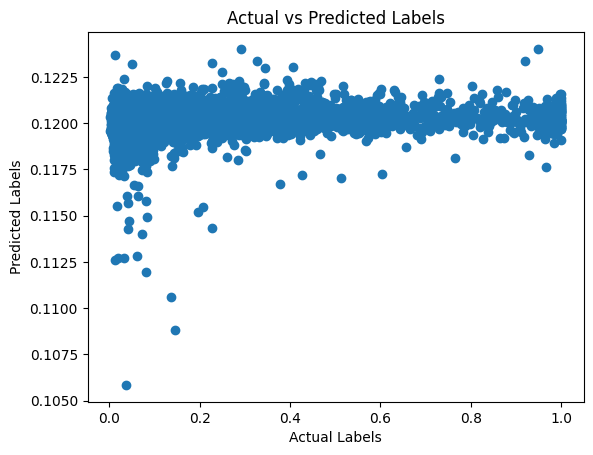

Correlation Matrix:
 [[1.         0.15619626]
 [0.15619626 1.        ]]


In [55]:
# Your Code Here
y_pred = RR.predict(full_X)

#show predictions have a linear correlation with actuals
plt.scatter(full_y, y_pred)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Actual vs Predicted Labels")
plt.show()

corr_matrix = np.corrcoef(full_y, y_pred)
print("Correlation Matrix:\n", corr_matrix)

**Question**: Why did you use the above method? Justify your answer

**Your Answer Here**
First I added a column of 1's to the start of the X matrix. This is to represent the intercept term.

Theta is then calculated as:  
$Θ = (X^T X + λI)^{-1} X^T y$.   
where X is the matrix of explanatory variables. y is the response variable. I is the identity matrix and λ is the regularization parameter.  

Lambda was arbitrarily set to 0.001 to achieve a moderate level of regularization.

To identify a positive linear relationship between predictions and actual labels, I did a scatter plot. Scatterplots allow us to visualize the relationship between 2 numerical variables - to visually allow us to identify whether data is correlated. It shows that the model did not produce a great linear relationship between actual and predicted values. The correlation coefficient of 0.156 also indicates a weak positively linear correlation between explanatory variables and the response. This could signify that the explanatory variables have a non-linear relationship with the output variable, or it could signify that further preprocessing is required to obtain a smoother linear relationship. When looking at the correlation plot from part 1, this result is not surprising, as the explanatory variables in the dataset have low linear correlations with the response variable. The correlation coefficient of auxilliary_rate and conjugate_rate with the response were both 0.04. Normalization had a correlation coefficient of 0.11. Tobe_verb_rate was -0.04. Preposition_rate was 0.07 and pronoun_rate was 0.14. This could indicate that the given variables in the dataset do not have a good linear relationship with the response, hence a linear model (like ridge regression) is not suitable at predicting the response with these variables. More complex feature engineering or data preprocessing might help the linear model predict though.

## $\color{Red}{Question\ 3.3}$ Ridge Regression in the Online Learning Setting
In this question, we create several building blocks required to learn with Ridge Regression in an online setting using stochastic gradient descent. You are first expected to derive the first derivative of the Ridge Regression loss function.

- Implement the `ridge_reg_loss_derivative` function to take in the features, labels, parameters, and hyperparameters, and return the first derivative $\frac{\delta \mathcal{L}}{\delta \theta}$ of the loss function $ \mathcal{L}$.

In [56]:
def ridge_reg_loss_derivative(X, y, theta, hyperparams):
    """
    takes data, parameters and hyperparameters to calculate the first derivative of ridge loss

    Params:
        X (numpy.array): a matrix/vector of features
        y (numpy.array): a matrix/vector of labels
        theta (numpy.array): a matrix/vector of parameters being trained
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
        derivative (numpy.array): the derivative used for updating the parameters
    """

    # Your Code Here
    lambda_ = hyperparams['lambda']

    y_pred = X @ theta
    error = y_pred - y
    derivative = 2 * (X.T @ error) + 2*lambda_ * theta

    return derivative

    #as ridge regression formula for loss = SUM((y_actual - y_pred)^2) + lambda * ||theta|| , so just took derivative

- Implement the `train_stoch_ridge_reg` function to take data, parameters and hyperparameters  and return the updated theta
- You are not allowed to use machine learning libraries such as `scikit-learn` or tensor computation libraries such as `tensorflow`, `keras`, `pytorch` etc. in this section. You will be penalised for using such libraries.

In [57]:
def train_stoch_ridge_reg(X, y, _theta, hyperparams):
    """
    takes data, parameters and hyperparameters and returns the updated parameters
    from training with data

    Params:
        X (numpy.array): a matrix/vector of features
        y (numpy.array): a matrix/vector of labels
        _theta (numpy.array): a matrix/vector of parameters being trained
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
        _theta (numpy.array): a matrix/vector of parameters updated after training
    """

    # Your Code Here
    learning_rate = hyperparams['learning_rate']
    lambda_ = hyperparams['lambda']

    # Calculate the gradient
    gradient = ridge_reg_loss_derivative(X, y, _theta, hyperparams)
    # Update the parameters using gradient descent
    _theta = _theta - learning_rate * gradient
    return _theta


## $\color{Red}{Question\ 3.4}$ Train and Monitor the Stochastic Ridge Regression Model
In this question, you are expected to use the previously defined stochastic gradient training function (`train_stoch_ridge_reg`) to train a ridge regression model using the `X_, y_` data structures from before. Record the relevant loss values computed in each iteration to analyse if the loss is diminishing over time.

- Implement `train_entire_model` function to take the dataset and train the model over multiple iterations.
    - Run the model for 2000 iterations to reduce the loss values over time
- Record the loss $\mathcal{L}$ values of the model over all the iterations.
- pass the list of losses as output from this function.

**Hints:**

- Set the initial weights (thetas) to a normal distribution scattered around mean 0.
- As the penalisation constant in the Ridge Regression, 0.1 is a good value to use
- A learning rate between 1e-6 and 1e-10 may be suitable for this task

In [58]:
def train_entire_model(X_, y_, hyperparams):
    """
    takes data, hyperparameters and returns the list of losses

    Params:
        X_ (numpy.array): a matrix/vector of features
        y_ (numpy.array): a matrix/vector of labels
        hyperparams (dict): a dictionary where the key is the hyperparameter name
                            and values is the hyperparameter value

    Returns:
        losses ([float]): list of loss values for each iteration of learning
    """

    # Your Code Here
    # initialize parameters and lists to store
    learning_rate = hyperparams['learning_rate']
    lambda_ = hyperparams['lambda']
    t = [] #thetas
    g= [] #gradients
    losses = []

    # Initialize weights of theta coefficients using random normal
    num_features = X_.shape[1]
    _theta = np.random.normal(scale=0.1, size=num_features)

    #update losses for each iteration
    num_iterations = 2000
    for i in range(num_iterations):
      # Update theta parameters using gradient descent
      _theta_update = train_stoch_ridge_reg(X_, y_, _theta, hyperparams)
      _theta = _theta_update
      # Calculate and store gradient
      gradient = ridge_reg_loss_derivative(X_, y_, _theta, hyperparams)
      g.append(gradient)
      #make predictions
      predictions = X_ @ _theta
      # the loss function used is the loss function for ridge regression
      # Calculate and store loss
      loss =  np.mean((predictions - y_)**2) + lambda_ * np.linalg.norm(_theta)**2
      losses.append(loss)
      t.append(_theta)


    return losses, t, g

In [59]:
X_, y_ = X_, y_ # Reusing data structures from before

hyperparameters = {
    # Your Code Here
    'learning_rate': 1e-7,
    'lambda': 0.1

}

losses, t, g = train_entire_model(X_, y_, hyperparameters)


- Implement the `visualise_loss_values` function to use the appropriate visualisations to plot the loss values in a meaningful way.
- The function does not have to return anything. Display the visualisation as a step within the implemented function.

In [60]:
def visualise_loss_values(loss_values):
    """
    takes relevant loss values and plots the loss values in the dataset over the iterations (epochs).

    Params:
        loss_values (dict): a dictionary that contains the loss values where key is the loss type
                            and values are the loss values.
    """
    # Your Code Here
    # the loss values is simply the loss function for a ridge regression
    plt.plot(range(len(loss_values)), loss_values)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.show()



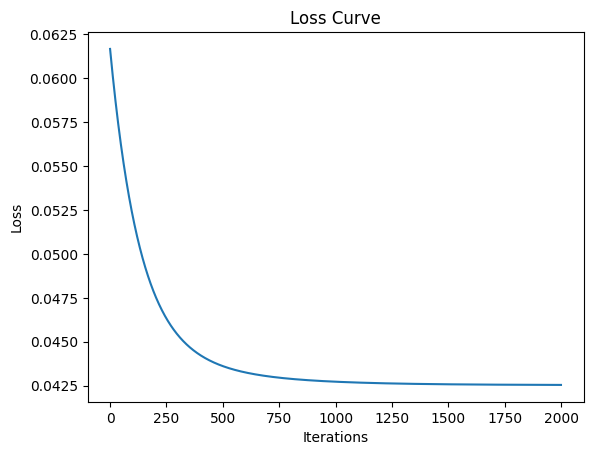

In [61]:
visualise_loss_values(losses)

**Question:**
- Does the loss get smaller over time? In either case, explain the reason behind it.
- For both the regularisation factor and the learning rate, plot the loss with a sample of larger and smaller values for each hyperparameter. Observe how the loss changes for each hyperparameter _individually_ and draw hypotheses justifying these observations.
    - __Note: you do not need to interpret the joint effects of changing the hyperparameter values__

**Your Answer Here**

Yes, as expected, losses get smaller over time. It converges to a minimum.

The function train_entire_model is designed to minimize loss while also favouring lower theta coefficients (through regularization). The loss function represents the difference between actual y-values and predicted y-values with a regularization term for coefficients.
The derivative (gradient) of the loss function is calculated, iteratively, for a given theta value. After the gradient is calculated, theta is updated to move "down" the loss function towards a minimum, by a factor of the learning_rate * derivative of the loss function (gradient).

Hence, each iteration updates the theta values in such a way that we move further down the loss function towards a minima (this can be a local minima or a global minima). This is why loss gets smaller over time

The regularization term is also included in the derivative (gradient). It penalizes large theta (coefficient) values, which helps prevent overfitting and increases the generalization capacity of the model.



#### Code Below Shows Plots for Changing Lambda and Learning Rates ####

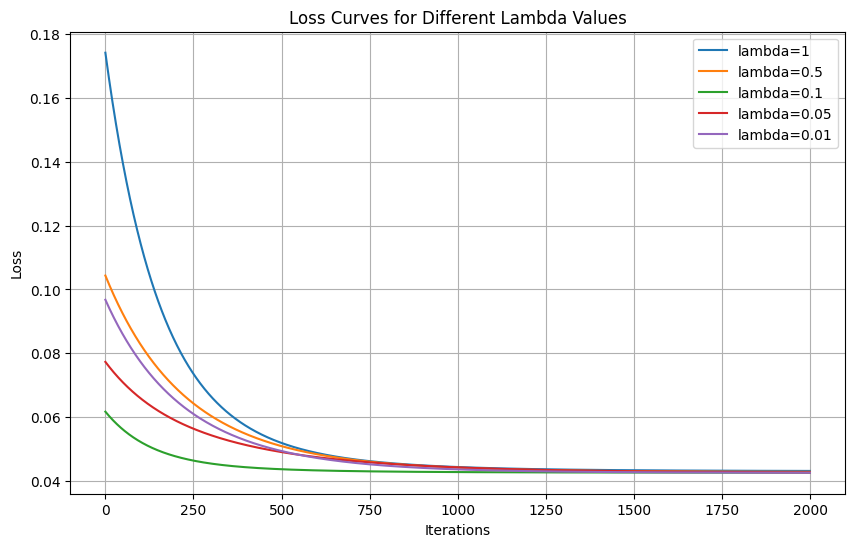

In [62]:
# changing lambda values only
hyperparameters = {
    'learning_rate': 1e-7,
    'lambda': 1

}

losses_2, _, _ = train_entire_model(X_, y_, hyperparameters)

hyperparameters = {
    'learning_rate': 1e-7,
    'lambda': 0.5

}

losses_3, _, _ = train_entire_model(X_, y_, hyperparameters)

hyperparameters = {
    'learning_rate': 1e-7,
    'lambda': 0.05

}

losses_4, _, _ = train_entire_model(X_, y_, hyperparameters)

hyperparameters = {
    'learning_rate': 1e-7,
    'lambda': 0.01

}

losses_5, _, _ = train_entire_model(X_, y_, hyperparameters)

plt.figure(figsize=(10, 6))

plt.plot(losses_2, label='lambda=1')
plt.plot(losses_3, label='lambda=0.5')
plt.plot(losses, label='lambda=0.1')
plt.plot(losses_4, label='lambda=0.05')
plt.plot(losses_5, label='lambda=0.01')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curves for Different Lambda Values')
plt.legend()
plt.grid(True)

plt.show()

Lambda is the regularization parameter. As lambda is increased, the model is penalized more heavily for larger coefficients. Larger lambdas puts greater pressure on the model to find smaller coefficients. However, lambdas that are too high could lead to excessive regularization and lead to models that are too simple, as it prevents effective learning. This is shown in the graph above, lambda's of 1 and 0.5 are initially associated with higher losses.

In this scenario, lower lambda values seem to improve the model's performance (and reduce loss) at lower iterations. This could indicate that my lambda was initially set too high - a lower lambda could have slighly improved performance. However, as the number of iterations increases, the value of lambda does not appear to have a significant impact on the loss - as all model converge to the same loss.

Seeing as though the lambdas all converge to the same point, it could mean that linear model fit to the data already has low weight coefficients, so adding a regularization parameter does not really have a substantial impact on the loss.

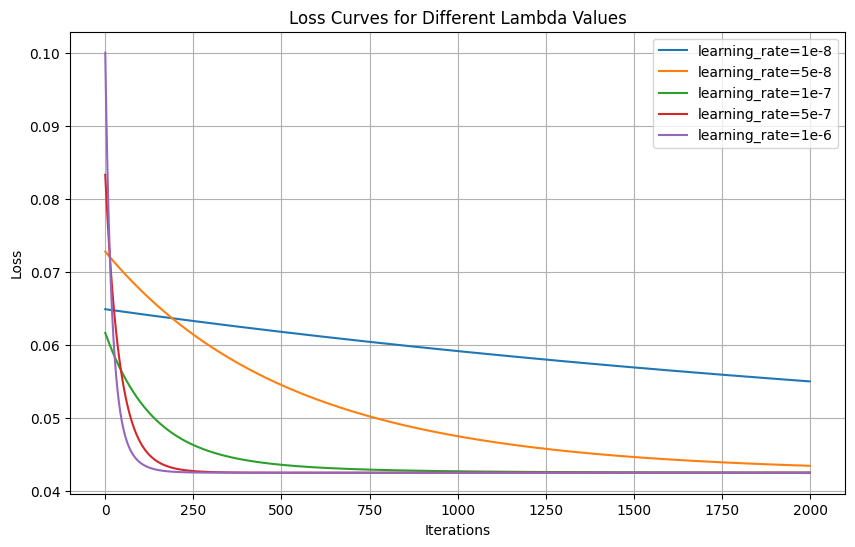

In [64]:
# changing learning rate only
hyperparameters = {
    'learning_rate': 1e-8,
    'lambda': 0.1

}

losses_2, _, _ = train_entire_model(X_, y_, hyperparameters)

hyperparameters = {
    'learning_rate': 5e-8,
    'lambda': 0.1

}

losses_3, _, _ = train_entire_model(X_, y_, hyperparameters)

hyperparameters = {
    'learning_rate': 5e-7,
    'lambda': 0.1

}

losses_4, _, _ = train_entire_model(X_, y_, hyperparameters)

hyperparameters = {
    'learning_rate': 1e-6,
    'lambda': 0.1

}

losses_5, _, _ = train_entire_model(X_, y_, hyperparameters)



plt.figure(figsize=(10, 6))

plt.plot(losses_2, label='learning_rate=1e-8')
plt.plot(losses_3, label='learning_rate=5e-8')
plt.plot(losses, label='learning_rate=1e-7')
plt.plot(losses_4, label='learning_rate=5e-7')
plt.plot(losses_5, label='learning_rate=1e-6')


plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curves for Different Lambda Values')
plt.legend()
plt.grid(True)

plt.show()

Learning rate impacts the speed at which the theta parameters are updated. This, in turn, impacts how losses are updated with each iteration. The model with a small learning rate (blue line) is still learning at the end of the 2000 iterations and has not converged to a minimum. The yellow line (with a relatively low learning rate) also appears to not have converged to a minimum as yet. The chosen learning rate (green line) converges to a minimum. Higher learning rates, such as the purple line, are shown to converge to a minimum fairly quickly. High learning rates can cause unstable learning - however this is not shown to be the case in this example.

We could be observing this because lower learning rates need more time to converge to a minimum while higher learning rates converge quite quickly. Higher learning rates, in this case, do not seem to produce unstable learning - it actually leads to convergence quite quickly. This could occur if the loss function is smooth and, as the loss function approaches a minimum, the derivative (gradient) becomes sufficiently low to avoid the risk of overshooting the minimum value.

## - End of Coursework -